# Projet 5 : Segmentez des clients d'un site e-commerce
## Partie 1 : Exploration

### Sommaire
 
**Partie 1 : Importation du jeu de données**
 - <a href="#C1"> 1. Importation des données</a>
    - <a href="#C11"> 1.1 Création d'une base de données **SQL** </a>
    - <a href="#C12"> 1.2 Assemblage du dataframe *df*, via **JOIN** </a>
    - <a href="#C13"> 1.3 Export du jeu de données **SQL to DataFrame**</a>
 
**Partie 2 : Nettoyage**
 - <a href="#C2"> 2. Nettoyage du jeu de données</a>
     - <a href="#C20"> 2.0 Première Agrégation de *df*</a>
     - <a href="#C21"> 2.1 Variables qualitatives </a>
     - <a href="#C22"> 2.2 Variables quantitatives </a>
     - <a href="#C23"> 2.3 Traitement des doublons </a>
         
**Partie 3 : Valeurs manquantes**
 - <a href="#C3"> 3. Traitement des valeurs manquantes</a>
     - <a href="#C31">3.1 Imputations des valeurs manquantes </a>
     - <a href="#C32">3.2 Agrégation de la table *df* </a>

 
**Partie 4 : Exploration**
 - <a href="#C4">4. Exploration des données </a>
     - <a href="#C41">4.1 Analyses univariées </a>
     - <a href="#C42">4.2 Analyses bivariées </a>
     - <a href="#C43">4.3 Analyses multivariées </a>


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import re
import seaborn as sns
import missingno as msno
import clean #mon module de fontions qui me permettent de nettoyer un dataframe
import plot_
import sqlite3 as sql
import folium

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# <a name="C1"> 1. Importation </a>

## <a name="C11"> 1.1 Création d'une base de données **SQL** </a>

In [2]:
ls = ['olist_customers_dataset.csv','olist_geolocation_dataset.csv',
'olist_order_items_dataset.csv','olist_order_payments_dataset.csv',
'olist_order_reviews_dataset.csv','olist_orders_dataset.csv','olist_products_dataset.csv',
'olist_sellers_dataset.csv','product_category_name_translation.csv']

dic = {}

conn = sql.connect('P5_DB.db')

for count, dataset in enumerate(ls):
  df = pd.read_csv(dataset)
  print(dataset)
  #print(df.shape)
  col = df.columns.tolist()
  col.append(df.shape)
  #print(col)
  dic['table_'+str(dataset[6:-12])] = col
  df.to_sql('table_'+str(dataset[6:-12]), conn)


olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_orders_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [3]:
dic

{'table_customers': ['customer_id',
  'customer_unique_id',
  'customer_zip_code_prefix',
  'customer_city',
  'customer_state',
  (99441, 5)],
 'table_geolocation': ['geolocation_zip_code_prefix',
  'geolocation_lat',
  'geolocation_lng',
  'geolocation_city',
  'geolocation_state',
  (1000163, 5)],
 'table_order_items': ['order_id',
  'order_item_id',
  'product_id',
  'seller_id',
  'shipping_limit_date',
  'price',
  'freight_value',
  (112650, 7)],
 'table_order_payments': ['order_id',
  'payment_sequential',
  'payment_type',
  'payment_installments',
  'payment_value',
  (103886, 5)],
 'table_order_reviews': ['review_id',
  'order_id',
  'review_score',
  'review_comment_title',
  'review_comment_message',
  'review_creation_date',
  'review_answer_timestamp',
  (99224, 7)],
 'table_orders': ['order_id',
  'customer_id',
  'order_status',
  'order_purchase_timestamp',
  'order_approved_at',
  'order_delivered_carrier_date',
  'order_delivered_customer_date',
  'order_estimated_d

In [4]:
!pip install ipython-sql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! pip install SQLAlchemy==1.4.47

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
! pip index versions sqlalchemy

sqlalchemy (2.0.10)
Available versions: 2.0.10, 2.0.9, 2.0.8, 2.0.7, 2.0.6, 2.0.5.post1, 2.0.4, 2.0.3, 2.0.2, 2.0.1, 2.0.0, 1.4.47, 1.4.46, 1.4.45, 1.4.44, 1.4.43, 1.4.42, 1.4.41, 1.4.40, 1.4.39, 1.4.38, 1.4.37, 1.4.36, 1.4.35, 1.4.32, 1.4.31, 1.4.30, 1.4.29, 1.4.28, 1.4.27, 1.4.26, 1.4.25, 1.4.24, 1.4.23, 1.4.22, 1.4.21, 1.4.20, 1.4.19, 1.4.18, 1.4.17, 1.4.16, 1.4.15, 1.4.14, 1.4.13, 1.4.12, 1.4.11, 1.4.10, 1.4.9, 1.4.8, 1.4.7, 1.4.6, 1.4.5, 1.4.4, 1.4.3, 1.4.2, 1.4.1, 1.4.0, 1.3.24, 1.3.23, 1.3.22, 1.3.21, 1.3.20, 1.3.19, 1.3.18, 1.3.17, 1.3.16, 1.3.15, 1.3.14, 1.3.13, 1.3.12, 1.3.11, 1.3.10, 1.3.9, 1.3.8, 1.3.7, 1.3.6, 1.3.5, 1.3.4, 1.3.3, 1.3.2, 1.3.1, 1.3.0, 1.2.19, 1.2.18, 1.2.17, 1.2.16, 1.2.15, 1.2.14, 1.2.13, 1.2.12, 1.2.11, 1.2.10, 1.2.9, 1.2.8, 1.2.7, 1.2.6, 1.2.5, 1.2.4, 1.2.3, 1.2.2, 1.2.1, 1.2.0, 1.1.18, 1.1.17, 1.1.16, 1.1.15, 1.1.14, 1.1.13, 1.1.12, 1.1.11, 1.1.10, 1.1.9, 1.1.8, 1.1.7, 1.1.6, 1.1.5, 1.1.4, 1.1.3, 1.1.2, 1.1.1, 1.1.0, 1.0.19, 1.0.18, 1.0.17, 1.0.16, 1.0.

In [7]:
import sqlalchemy
## Connnection à la base de données avec un URL à ajouter à un aide-mémoire
engine  = sqlalchemy.create_engine('sqlite:///P5_DB.db')

In [8]:
print("connecting with engine " + str(engine))

connecting with engine Engine(sqlite:///P5_DB.db)


In [9]:
 sqlalchemy.__version__

'1.4.47'

In [10]:
%load_ext sql

In [11]:
%sql sqlite:///P5_DB.db

Après avoir établi un schéma de connexion des tables. Je vais les joindre pour obtenir une table. 

## <a name="C12"> 1.2 Assemblage du dataframe *df*, via **JOIN** </a>

In [12]:
%%sql

-- join 1 : Création de la table table_df, la table finale que j'exporterai pour l'exploration 

CREATE TABLE table_join1 AS
SELECT  order_id, customer_unique_id, customer_zip_code_prefix, order_purchase_timestamp
--order_delivered_customer_date, order_status
FROM table_orders 
JOIN table_customers ON  table_orders.customer_id = table_customers.customer_id ;

 * sqlite:///P5_DB.db
Done.


[]

In [13]:
%%sql

-- join 2 : Création de la table products, avec les catégories traduite 

CREATE TABLE table_join2 AS
SELECT product_id, product_category_name_english, product_weight_g
FROM table_products 
LEFT JOIN table_t_category_name_tra ON  table_products.product_category_name = table_t_category_name_tra.product_category_name ;

 * sqlite:///P5_DB.db
Done.


[]

In [14]:
%%sql

-- join 3 : Création de la table qui joint produit et order

CREATE TABLE table_join3 AS
SELECT order_id, table_order_items.product_id, order_item_id, product_category_name_english, product_weight_g, 
seller_id, price, freight_value
FROM table_order_items
LEFT JOIN table_join2 ON  table_order_items.product_id = table_join2.product_id ; 



 * sqlite:///P5_DB.db
Done.


[]

In [15]:
%%sql

-- join 4 : Création de la table qui joint product_orders et sellers

CREATE TABLE table_join4 AS
SELECT order_id, product_id, order_item_id,	product_category_name_english,  
product_weight_g, seller_zip_code_prefix, price, freight_value
FROM table_join3
LEFT JOIN table_sellers ON  table_join3.seller_id = table_sellers.seller_id; 




 * sqlite:///P5_DB.db
Done.


[]

In [16]:
%%sql

-- join 5 : JOIN table_join1 à la table order_reviews

CREATE TABLE table_join5 AS
SELECT table_join1.order_id, customer_unique_id, 
customer_zip_code_prefix, review_score, order_purchase_timestamp
--order_delivered_customer_date,	order_status,
--review_comment_message,	
--review_creation_date,	
--review_answer_timestamp
FROM table_join1
LEFT JOIN table_order_reviews ON  table_join1.order_id = table_order_reviews.order_id; 

 * sqlite:///P5_DB.db
Done.


[]

In [17]:
%%sql

-- join 6 : JOIN table_df à la table order_reviews

CREATE TABLE table_join6 AS
SELECT table_join5.order_id, customer_unique_id, customer_zip_code_prefix, review_score, order_purchase_timestamp, 
payment_installments, payment_value, payment_type, payment_sequential
FROM table_join5 
LEFT JOIN table_order_payments ON table_join5.order_id =  table_order_payments.order_id  ; 

 * sqlite:///P5_DB.db
Done.


[]

In [18]:
%%sql

-- join 7 : JOIN table_df à la table

CREATE TABLE table_join7 AS
SELECT *
FROM table_join4
LEFT JOIN table_join6 ON  table_join4.order_id = table_join6.order_id; 

 * sqlite:///P5_DB.db
Done.


[]

In [19]:
%%sql 

SELECT *
FROM table_join7
LIMIT 12;

 * sqlite:///P5_DB.db
Done.


order_id,product_id,order_item_id,product_category_name_english,product_weight_g,seller_zip_code_prefix,price,freight_value,order_id:1,customer_unique_id,customer_zip_code_prefix,review_score,order_purchase_timestamp,payment_installments,payment_value,payment_type,payment_sequential
00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,cool_stuff,650.0,27277,58.9,13.29,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,28013,5,2017-09-13 08:59:02,2,72.19,credit_card,1
00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,pet_shop,30000.0,3471,239.9,19.93,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,15775,4,2017-04-26 10:53:06,3,259.83,credit_card,1
000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,furniture_decor,3050.0,37564,199.0,17.87,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,35661,5,2018-01-14 14:33:31,5,216.87,credit_card,1
00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,perfumery,200.0,14403,12.99,12.79,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,12952,4,2018-08-08 10:00:35,2,25.78,credit_card,1
00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,garden_tools,3750.0,87900,199.9,18.14,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,13226,5,2017-02-04 13:57:51,3,218.04,credit_card,1
00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,1,housewares,450.0,14091,21.9,12.69,00048cc3ae777c65dbb7d2a0634bc1ea,85c835d128beae5b4ce8602c491bf385,38017,4,2017-05-15 21:42:34,1,34.59,boleto,1
00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,1,telephony,200.0,1026,19.9,11.85,00054e8431b9d7675808bcb819fb4a32,635d9ac1680f03288e72ada3a1035803,16700,4,2017-12-10 11:53:48,1,31.75,credit_card,1
000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,1,garden_tools,13805.0,19010,810.0,70.75,000576fe39319847cbb9d288c5617fa6,fda4476abb6307ab3c415b7e6d026526,11702,5,2018-07-04 12:08:27,10,880.75,credit_card,1
0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,1,health_beauty,2000.0,3702,145.95,11.65,0005a1a1728c9d785b8e2b08b904576c,639d23421f5517f69d0c3d6e6564cf0e,11075,1,2018-03-19 18:40:33,3,157.6,credit_card,1
0005f50442cb953dcd1d21e1fb923495,4535b0e1091c278dfd193e5a1d63b39f,1,books_technical,850.0,2274,53.99,11.4,0005f50442cb953dcd1d21e1fb923495,0782c41380992a5a533489063df0eef6,6636,4,2018-07-02 13:59:39,1,65.39,credit_card,1


les features qui m'intéressent :

- customer_unique_id (clé/primaire de la table finale)
- 'customer_zip_code_prefix',
- 'order_approved_at'
- 'seller_zip_code_prefix'
- order_id 
- product_id
- 'product_weight_g'
- product_category_name_english
- price
- payment_type
- payment_installments
- payment_value
- review_score 
- review_comment_message
- 'order_approved_at'
- 'order_delivered_customer_date'

In [20]:
%%sql
SELECT COUNT(*) FROM table_join7

 * sqlite:///P5_DB.db
Done.


COUNT(*)
118310


In [21]:
%%sql
CREATE TABLE df AS
SELECT customer_unique_id as id_clients, 
order_id as id_commande,	
product_id as id_produit,
order_item_id as id_produit_commande,	product_category_name_english as categorie,	product_weight_g as poid_g,	
customer_zip_code_prefix as code_postal_client,
seller_zip_code_prefix as code_postal_vendeur, 
payment_sequential as num_methode_paiement,	
payment_type as type_paiement,	
payment_installments as nb_echeances,	payment_value as paiement,
strftime("%d/%m/%Y",order_purchase_timestamp) as date_commande,
--order_status as statut_commande,
-- strftime("%d/%m/%Y",order_delivered_customer_date) as date_livraison	,
review_score as critique_note,
-- strftime("%d/%m/%Y",review_creation_date) as critique_date,
-- strftime("%d/%m/%Y",review_answer_timestamp) as critique_date_reponse,
price as prix, freight_value as frais_port
FROM table_join7;

 * sqlite:///P5_DB.db
Done.


[]

In [22]:
%%sql
SELECT * 
FROM df

LIMIT 12;

 * sqlite:///P5_DB.db
Done.


id_clients,id_commande,id_produit,id_produit_commande,categorie,poid_g,code_postal_client,code_postal_vendeur,num_methode_paiement,type_paiement,nb_echeances,paiement,date_commande,critique_note,prix,frais_port
871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,cool_stuff,650.0,28013,27277,1,credit_card,2,72.19,13/09/2017,5,58.9,13.29
eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,pet_shop,30000.0,15775,3471,1,credit_card,3,259.83,26/04/2017,4,239.9,19.93
3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,furniture_decor,3050.0,35661,37564,1,credit_card,5,216.87,14/01/2018,5,199.0,17.87
af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,perfumery,200.0,12952,14403,1,credit_card,2,25.78,08/08/2018,4,12.99,12.79
64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,garden_tools,3750.0,13226,87900,1,credit_card,3,218.04,04/02/2017,5,199.9,18.14
85c835d128beae5b4ce8602c491bf385,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,1,housewares,450.0,38017,14091,1,boleto,1,34.59,15/05/2017,4,21.9,12.69
635d9ac1680f03288e72ada3a1035803,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,1,telephony,200.0,16700,1026,1,credit_card,1,31.75,10/12/2017,4,19.9,11.85
fda4476abb6307ab3c415b7e6d026526,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,1,garden_tools,13805.0,11702,19010,1,credit_card,10,880.75,04/07/2018,5,810.0,70.75
639d23421f5517f69d0c3d6e6564cf0e,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,1,health_beauty,2000.0,11075,3702,1,credit_card,3,157.6,19/03/2018,1,145.95,11.65
0782c41380992a5a533489063df0eef6,0005f50442cb953dcd1d21e1fb923495,4535b0e1091c278dfd193e5a1d63b39f,1,books_technical,850.0,6636,2274,1,credit_card,1,65.39,02/07/2018,4,53.99,11.4


## <a name="C13"> 1.3 Export du jeu de données **SQL to DataFrame**</a>

In [23]:
result = %sql SELECT * FROM df 
df = result.DataFrame()

 * sqlite:///P5_DB.db
Done.


In [24]:
result_geo = %sql SELECT * FROM table_geolocation
df_geo = result_geo.DataFrame()

 * sqlite:///P5_DB.db
Done.


In [25]:
df.head()

,id_clients,id_commande,id_produit,id_produit_commande,categorie,poid_g,code_postal_client,code_postal_vendeur,num_methode_paiement,type_paiement,nb_echeances,paiement,date_commande,critique_note,prix,frais_port
0,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,cool_stuff,650.0,28013,27277,1.0,credit_card,2.0,72.19,13/09/2017,5.0,58.90,13.29
1,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,pet_shop,30000.0,15775,3471,1.0,credit_card,3.0,259.83,26/04/2017,4.0,239.90,19.93
2,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,furniture_decor,3050.0,35661,37564,1.0,credit_card,5.0,216.87,14/01/2018,5.0,199.00,17.87
3,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,perfumery,200.0,12952,14403,1.0,credit_card,2.0,25.78,08/08/2018,4.0,12.99,12.79
4,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,garden_tools,3750.0,13226,87900,1.0,credit_card,3.0,218.04,04/02/2017,5.0,199.90,18.14


In [26]:
df_geo.head()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


Brazil zip code : first part composed of 5 digits where each digit represents the 1) region, 2) sub-region, 3) sector, 4) subsector, 5) subsector divider;

# <a name="C2"> 2. Nettoyage du jeu de données</a>

## <a name="C20"> 2.0 Première Agrégation de *df*</a>

In [27]:
df.columns

Index(['id_clients', 'id_commande', 'id_produit', 'id_produit_commande',
       'categorie', 'poid_g', 'code_postal_client', 'code_postal_vendeur',
       'num_methode_paiement', 'type_paiement', 'nb_echeances', 'paiement',
       'date_commande', 'critique_note', 'prix', 'frais_port'],
      dtype='object')

In [28]:
df[(df['nb_echeances']==5) & (df['id_produit_commande'] > 1) & (df['num_methode_paiement'] > 1 )]

,id_clients,id_commande,id_produit,id_produit_commande,categorie,poid_g,code_postal_client,code_postal_vendeur,num_methode_paiement,type_paiement,nb_echeances,paiement,date_commande,critique_note,prix,frais_port
18769,d3bf48abdd573e74110b3e79d7b07ed1,28e418b320f6b759b6aea79734f165e5,fb8c11da2e1b1634e879d1c3c6762dc2,2,computers,2400.0,74970,42738,2.0,credit_card,5.0,800.72,02/09/2017,5.0,850.0,35.36
42595,c6abdb335cf117fb7fe0bb9bc1365586,5c0623ce8050c2cddeec3575bfbe0a53,4c8fae70c244a7ff63b9c1f73fb0a987,2,construction_tools_construction,2750.0,29905,84530,2.0,credit_card,5.0,107.31,25/07/2018,5.0,109.9,87.83
73498,b6108acc674ae5c99e29adc1047d1049,9f738fc8b806bc3d86ccf78855e82eeb,900a1000340c354f62ee5f07f3a080ac,2,garden_tools,1300.0,59650,13403,2.0,credit_card,5.0,199.64,05/05/2017,5.0,174.8,24.84
77193,8856412cf9cd5a3577968bad79e93bc6,a76096ddae15d50a36d7cf86823a2c7e,42a2c92a0979a949ca4ea89ec5c7b934,2,housewares,7000.0,35650,13206,2.0,credit_card,5.0,84.15,29/11/2017,3.0,58.9,25.25


In [29]:
df[df['id_commande']== '28e418b320f6b759b6aea79734f165e5']

,id_clients,id_commande,id_produit,id_produit_commande,categorie,poid_g,code_postal_client,code_postal_vendeur,num_methode_paiement,type_paiement,nb_echeances,paiement,date_commande,critique_note,prix,frais_port
18767,d3bf48abdd573e74110b3e79d7b07ed1,28e418b320f6b759b6aea79734f165e5,fb8c11da2e1b1634e879d1c3c6762dc2,1,computers,2400.0,74970,42738,2.0,credit_card,5.0,800.72,02/09/2017,5.0,850.0,35.36
18768,d3bf48abdd573e74110b3e79d7b07ed1,28e418b320f6b759b6aea79734f165e5,fb8c11da2e1b1634e879d1c3c6762dc2,1,computers,2400.0,74970,42738,1.0,credit_card,6.0,970.00,02/09/2017,5.0,850.0,35.36
18769,d3bf48abdd573e74110b3e79d7b07ed1,28e418b320f6b759b6aea79734f165e5,fb8c11da2e1b1634e879d1c3c6762dc2,2,computers,2400.0,74970,42738,2.0,credit_card,5.0,800.72,02/09/2017,5.0,850.0,35.36
18770,d3bf48abdd573e74110b3e79d7b07ed1,28e418b320f6b759b6aea79734f165e5,fb8c11da2e1b1634e879d1c3c6762dc2,2,computers,2400.0,74970,42738,1.0,credit_card,6.0,970.00,02/09/2017,5.0,850.0,35.36


***Stratégie***: agréger les valeurs de df pour avoir une ligne par commande. 


---


*   Il n'ya qu'un **'id_client'** par commande logiquement idem pour le **'code_postal_client'**, vérification après l'aggrégation
*  **'id_produit_commande'** : je cherche l'id unique de chaque article par commande puis je calcule l'effectif total, la feature devient : **'nb_article'**. 
*  **'catégorie'** : mention multiple pour les commandes comportant plusieurs types de catégorie d'article. 
*  **'type_paiement'** : même méthode que **'catégorie'**
*  **'poid_g'** : j'aggrège pour obtenir le poid de chaque commande. Il y a un poid par article commandé, je somme les poids de chaque article. 
*  **'code_postal_vendeur'** : S'il y en a plusieurs. Je conserve les deux dans la feature 'code_postal_vendeur', sous forme de chaîne de caractère 'code1+code2+code3+...'
*  **'nb_echeances'**  : feature aggrégée par 'id_commande' et 'num_type_paiement', puis je conserve le nombre maxiumal d'échéances que j'attribue à chaque commande. 
*  **'paiement'** : Il existe une valeur de paiement par **'id_commande'** et par **num_type_paiement**. J'aggrège selon ces deux features et je somme. 

*   Suppression des features **'id_produit', 'num_methode_paiement', 'prix'**






---


- ### 'id_produit_commande'

In [30]:
df_1 = df.groupby('id_commande')['id_produit_commande'].nunique()
df_1 = df_1.reset_index()
df_1 = df_1.rename(columns = {'id_produit_commande': 'nb_article'})

- ### 'categorie'

In [31]:
df_com  = df.groupby('id_commande')['categorie'].nunique()
#Faire en sorte qu'il n'y ait qu'une catégorie par commande
ls_com  = df_com[df_com > 1].index
ls_com

for comm in ls_com:
  df.loc[df['id_commande'] == comm, 'categorie'] = 'multiple'

- ### 'type_paiement'

In [32]:
df_com  = df.groupby('id_commande')['type_paiement'].nunique()
ls_com  = df_com[df_com > 1].index
ls_com

for comm in ls_com:
  df.loc[df['id_commande'] == comm, 'type_paiement'] = 'multiple'
  #df_tamp = df.loc[df['id_commande'] == comm] 
  #type_paiement = ''
  #for i,row in df_tamp.iterrows():
    #type_paiement += '+'+row['type_paiement']
  #df.loc[df['id_commande'] == comm, 'type_paiement'] = type_paiement 
  #print(type_paiement)


- ### 'poid_g' et 'frais_port'

In [33]:
#Stratégie : obtenir le poid, les frais de port et le paiement total de chaque commande 
#Étape 1 : agréger c'est features pour chaque commande et chaque article. 
df_3 = df.groupby(['id_commande', 'id_produit_commande'])['poid_g', 'frais_port'].mean()
df_3 = df_3.reset_index()
df_3

,id_commande,id_produit_commande,poid_g,frais_port
0,00010242fe8c5a6d1ba2dd792cb16214,1,650.0,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,30000.0,19.93
2,000229ec398224ef6ca0657da4fc703e,1,3050.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,200.0,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3750.0,18.14
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,10150.0,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,8950.0,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,967.0,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,100.0,8.72


In [34]:
#Étape 2 : La somme total. 
df_4 = df_3.groupby('id_commande')['poid_g', 'frais_port'].sum()
df_4 = df_4.reset_index()
df_4

,id_commande,poid_g,frais_port
0,00010242fe8c5a6d1ba2dd792cb16214,650.0,13.29
1,00018f77f2f0320c557190d7a144bdd3,30000.0,19.93
2,000229ec398224ef6ca0657da4fc703e,3050.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,200.0,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,3750.0,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,10150.0,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,8950.0,36.53
98663,fffce4705a9662cd70adb13d4a31832d,967.0,16.95
98664,fffe18544ffabc95dfada21779c9644f,100.0,8.72


- ### Feature casting

In [35]:
#Feature casting
df['code_postal_client']= df['code_postal_client'].astype('object')
df['code_postal_vendeur']= df['code_postal_vendeur'].astype('object')
df['date_commande'] = pd.to_datetime(df['date_commande'])


for i, it in df['code_postal_client'].items():
  df.loc[i,'code_postal_client'] = str(it)

for i, it in df['code_postal_vendeur'].items():
  df.loc[i,'code_postal_vendeur'] = str(it)

In [36]:
#Le pre-fix zip code est un ensemble de 5 digits. J'homogénéise.
df_tamp = df[df['code_postal_client'].str.len() == 4]
for i, it in df_tamp['code_postal_client'].items():
  df.loc[i, 'code_postal_client'] = '0'+it

df_tamp = df[df['code_postal_vendeur'].str.len() == 4]
for i, it in df_tamp['code_postal_vendeur'].items():
  df.loc[i, 'code_postal_vendeur'] = '0'+it



In [37]:
#Vérification OK - tous les prefixes ont une longueur = 5
df[df['code_postal_client'].str.len()!=5]
#df[df['code_postal_vendeur'].str.len()!=5]

,id_clients,id_commande,id_produit,id_produit_commande,categorie,poid_g,code_postal_client,code_postal_vendeur,num_methode_paiement,type_paiement,nb_echeances,paiement,date_commande,critique_note,prix,frais_port


- ### 'code_postal_vendeur'

In [38]:
df_tamp = df.groupby('id_commande')['code_postal_vendeur'].nunique()
df_tamp[df_tamp > 1]

id_commande
002f98c0f7efd42638ed6100ca699b42    2
00bcee890eba57a9767c7b5ca12d3a1b    2
01144cadcf64b6427f0a6580a3033220    2
013a98b3a668bcef05b98898177f6923    2
014405982914c2cde2796ddcf0b8703d    2
                                   ..
fe6c4a42298295647106b42549a98eea    2
fe755232f249d0844951831268c55593    2
feded510efe2a76dd134d8533af626f9    2
ff2a353ee8dfd97ba95c73cca4ed2636    2
ffb8f7de8940249a3221252818937ecb    3
Name: code_postal_vendeur, Length: 1126, dtype: int64

In [39]:
test = df.groupby('id_commande')['code_postal_vendeur'].value_counts().reset_index('id_commande')
test.loc[test['id_commande'] == '002f98c0f7efd42638ed6100ca699b42']

,id_commande,code_postal_vendeur
code_postal_vendeur,,
02310,002f98c0f7efd42638ed6100ca699b42,1
38440,002f98c0f7efd42638ed6100ca699b42,1


In [40]:
df_tamp = df.groupby('id_commande')['code_postal_vendeur'].value_counts().reset_index('id_commande')
df_tamp = df_tamp.rename(columns = {'code_postal_vendeur':'compte'})
df_tamp = df_tamp.reset_index()
df_tamp = df_tamp[['id_commande', 'code_postal_vendeur','compte']]
df_tamp

#Vérification de la démarche OK 
multi_code = df_tamp.value_counts('id_commande')
ls_com = multi_code[multi_code > 1].index


In [41]:
#Suite Vérification OK 
#Cette commande a bien 5 codes postaux vendeur  différents 
df[df['id_commande']== 'cf5c8d9f52807cb2d2f0a0ff54c478da']

,id_clients,id_commande,id_produit,id_produit_commande,categorie,poid_g,code_postal_client,code_postal_vendeur,num_methode_paiement,type_paiement,nb_echeances,paiement,date_commande,critique_note,prix,frais_port
96009,8dc697d03f771cecc2534534a73eaaf9,cf5c8d9f52807cb2d2f0a0ff54c478da,064c975d37d3c646bd94d94c6e16f37e,1,multiple,200.0,78050,05522,1.0,credit_card,2.0,217.18,2018-08-24,1.0,17.99,9.00
96010,8dc697d03f771cecc2534534a73eaaf9,cf5c8d9f52807cb2d2f0a0ff54c478da,7b44e5ea770ef06810f5df89006cc8b2,2,multiple,4100.0,78050,07790,1.0,credit_card,2.0,217.18,2018-08-24,1.0,88.90,9.00
96011,8dc697d03f771cecc2534534a73eaaf9,cf5c8d9f52807cb2d2f0a0ff54c478da,58f579bb52bea63fe1c6c39c2d4272d8,3,multiple,150.0,78050,05522,1.0,credit_card,2.0,217.18,2018-08-24,1.0,18.60,9.00
96012,8dc697d03f771cecc2534534a73eaaf9,cf5c8d9f52807cb2d2f0a0ff54c478da,64ec83de8f0026319c8829351e3d6e23,4,multiple,500.0,78050,02215,1.0,credit_card,2.0,217.18,2018-08-24,1.0,13.90,9.00
96013,8dc697d03f771cecc2534534a73eaaf9,cf5c8d9f52807cb2d2f0a0ff54c478da,24543438ec09114a42a153f76ae693f2,5,multiple,963.0,78050,04106,1.0,credit_card,2.0,217.18,2018-08-24,1.0,6.90,9.00
96014,8dc697d03f771cecc2534534a73eaaf9,cf5c8d9f52807cb2d2f0a0ff54c478da,a7bbff32c7321478b29f924301a1867d,6,multiple,300.0,78050,81460,1.0,credit_card,2.0,217.18,2018-08-24,1.0,16.90,8.99


In [42]:
df_tamp[df_tamp['id_commande']== 'cf5c8d9f52807cb2d2f0a0ff54c478da']

,id_commande,code_postal_vendeur,compte
80925,cf5c8d9f52807cb2d2f0a0ff54c478da,05522,2
80926,cf5c8d9f52807cb2d2f0a0ff54c478da,02215,1
80927,cf5c8d9f52807cb2d2f0a0ff54c478da,04106,1
80928,cf5c8d9f52807cb2d2f0a0ff54c478da,07790,1
80929,cf5c8d9f52807cb2d2f0a0ff54c478da,81460,1


In [43]:
if len(df_tamp) != 0:
  for comm in ls_com :
    df_tamp1 = df_tamp[df_tamp['id_commande'] == comm]
    ls = ''
    for i,row in df_tamp1.iterrows():
      ls += '+'+str(row['code_postal_vendeur'])
      #print(ls)
    df.loc[df['id_commande'] == comm, 'code_postal_vendeur'] = ls
else : 
  print('dataframe déjà traité' )

- ### 'nb_echeances'

In [44]:
df.columns

Index(['id_clients', 'id_commande', 'id_produit', 'id_produit_commande',
       'categorie', 'poid_g', 'code_postal_client', 'code_postal_vendeur',
       'num_methode_paiement', 'type_paiement', 'nb_echeances', 'paiement',
       'date_commande', 'critique_note', 'prix', 'frais_port'],
      dtype='object')

In [45]:
df_2 = df.groupby(['id_commande', 'num_methode_paiement'])['nb_echeances'].value_counts()
df_2 = df_2.reset_index(['id_commande'])
df_2 = df_2.rename(columns = {'nb_echeances':'compte'})
df_2 = df_2.reset_index()
df_2 = df_2[['id_commande', 'num_methode_paiement', 'nb_echeances']]
df_2[df_2['num_methode_paiement']>1]
#df_2.loc['00010242fe8c5a6d1ba2dd792cb16214']

,id_commande,num_methode_paiement,nb_echeances
36,0016dfedd97fc2950e388d2971d718c7,2.0,1.0
74,002f19a65a2ddd70a090297872e6d64e,2.0,1.0
163,0071ee2429bc1efdc43aa3e073a5290e,2.0,1.0
218,009ac365164f8e06f59d18a08045f6c4,2.0,1.0
219,009ac365164f8e06f59d18a08045f6c4,3.0,1.0
...,...,...,...
102905,ff978de32e717acd3b5abe1fb069d2b6,3.0,1.0
102906,ff978de32e717acd3b5abe1fb069d2b6,4.0,1.0
102918,ffa1dd97810de91a03abd7bd76d2fed1,2.0,1.0
102923,ffa39020fe7c8a3e907320e1bec4b985,2.0,1.0


In [46]:
#Vérification OK 
df[df['id_commande']== '0016dfedd97fc2950e388d2971d718c7']

,id_clients,id_commande,id_produit,id_produit_commande,categorie,poid_g,code_postal_client,code_postal_vendeur,num_methode_paiement,type_paiement,nb_echeances,paiement,date_commande,critique_note,prix,frais_port
38,33febb33a42a35f5826a22584b127f9d,0016dfedd97fc2950e388d2971d718c7,4089861a1bd4685da70bddd6b4f974f1,1,garden_tools,1500.0,45860,04041,2.0,multiple,1.0,17.92,2017-04-28,5.0,49.75,20.8
39,33febb33a42a35f5826a22584b127f9d,0016dfedd97fc2950e388d2971d718c7,4089861a1bd4685da70bddd6b4f974f1,1,garden_tools,1500.0,45860,04041,1.0,multiple,5.0,52.63,2017-04-28,5.0,49.75,20.8


In [47]:
#Aggrégation de df_2 par commande en prenant le max du nombre d'échéances 
df_2 = df_2.groupby(['id_commande'])['nb_echeances'].max()
df_2 = df_2.reset_index()
df_2

,id_commande,nb_echeances
0,00010242fe8c5a6d1ba2dd792cb16214,2.0
1,00018f77f2f0320c557190d7a144bdd3,3.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,3.0
...,...,...
98660,fffc94f6ce00a00581880bf54a75a037,1.0
98661,fffcd46ef2263f404302a634eb57f7eb,1.0
98662,fffce4705a9662cd70adb13d4a31832d,3.0
98663,fffe18544ffabc95dfada21779c9644f,3.0


In [48]:
#Vérification OK
df_2[df_2['id_commande']== '0016dfedd97fc2950e388d2971d718c7']

,id_commande,nb_echeances
35,0016dfedd97fc2950e388d2971d718c7,5.0


- ### 'paiement'

In [49]:
df_5  = df.groupby(['id_commande', 'num_methode_paiement'])['paiement'].sum()
df_5 = df_5.reset_index()
df_5

,id_commande,num_methode_paiement,paiement
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,218.04
...,...,...,...
103051,fffc94f6ce00a00581880bf54a75a037,1.0,343.40
103052,fffcd46ef2263f404302a634eb57f7eb,1.0,386.53
103053,fffce4705a9662cd70adb13d4a31832d,1.0,116.85
103054,fffe18544ffabc95dfada21779c9644f,1.0,64.71


In [50]:
df_6 = df_5.groupby('id_commande')['paiement'].sum()
df_6 = df_6.reset_index()
df_6

,id_commande,paiement
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
98660,fffc94f6ce00a00581880bf54a75a037,343.40
98661,fffcd46ef2263f404302a634eb57f7eb,386.53
98662,fffce4705a9662cd70adb13d4a31832d,116.85
98663,fffe18544ffabc95dfada21779c9644f,64.71


In [51]:
## vérification 
df_6[df_6['id_commande']=='0016dfedd97fc2950e388d2971d718c7']

,id_commande,paiement
35,0016dfedd97fc2950e388d2971d718c7,70.55


In [52]:
#vérfication OK 
df[df['id_commande']=='0016dfedd97fc2950e388d2971d718c7']

,id_clients,id_commande,id_produit,id_produit_commande,categorie,poid_g,code_postal_client,code_postal_vendeur,num_methode_paiement,type_paiement,nb_echeances,paiement,date_commande,critique_note,prix,frais_port
38,33febb33a42a35f5826a22584b127f9d,0016dfedd97fc2950e388d2971d718c7,4089861a1bd4685da70bddd6b4f974f1,1,garden_tools,1500.0,45860,04041,2.0,multiple,1.0,17.92,2017-04-28,5.0,49.75,20.8
39,33febb33a42a35f5826a22584b127f9d,0016dfedd97fc2950e388d2971d718c7,4089861a1bd4685da70bddd6b4f974f1,1,garden_tools,1500.0,45860,04041,1.0,multiple,5.0,52.63,2017-04-28,5.0,49.75,20.8


- ### Les merge 

In [53]:
df_1 = df_1.merge(df_2, how = 'left', on = 'id_commande')
df_1 

,id_commande,nb_article,nb_echeances
0,00010242fe8c5a6d1ba2dd792cb16214,1,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,3.0
2,000229ec398224ef6ca0657da4fc703e,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3.0
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1,1.0
98662,fffcd46ef2263f404302a634eb57f7eb,1,1.0
98663,fffce4705a9662cd70adb13d4a31832d,1,3.0
98664,fffe18544ffabc95dfada21779c9644f,1,3.0


In [54]:
df_1 = df_1.merge(df_4, how = 'left', on = 'id_commande')
df_1 

,id_commande,nb_article,nb_echeances,poid_g,frais_port
0,00010242fe8c5a6d1ba2dd792cb16214,1,2.0,650.0,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,3.0,30000.0,19.93
2,000229ec398224ef6ca0657da4fc703e,1,5.0,3050.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,2.0,200.0,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3.0,3750.0,18.14
...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1,1.0,10150.0,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,1,1.0,8950.0,36.53
98663,fffce4705a9662cd70adb13d4a31832d,1,3.0,967.0,16.95
98664,fffe18544ffabc95dfada21779c9644f,1,3.0,100.0,8.72


In [55]:
df = df.drop(columns = ['id_produit', 'prix', 'frais_port', 'id_produit_commande', 'paiement',
                        'nb_echeances', 'poid_g', 'num_methode_paiement']) 

In [56]:
df = df_1.merge(df, how = 'left', on = 'id_commande')

In [57]:
df = df.merge(df_6, how = 'left', on = 'id_commande')
df

,id_commande,nb_article,nb_echeances,poid_g,frais_port,id_clients,categorie,code_postal_client,code_postal_vendeur,type_paiement,date_commande,critique_note,paiement
0,00010242fe8c5a6d1ba2dd792cb16214,1,2.0,650.0,13.29,871766c5855e863f6eccc05f988b23cb,cool_stuff,28013,27277,credit_card,2017-09-13,5.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,3.0,30000.0,19.93,eb28e67c4c0b83846050ddfb8a35d051,pet_shop,15775,03471,credit_card,2017-04-26,4.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,5.0,3050.0,17.87,3818d81c6709e39d06b2738a8d3a2474,furniture_decor,35661,37564,credit_card,2018-01-14,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,2.0,200.0,12.79,af861d436cfc08b2c2ddefd0ba074622,perfumery,12952,14403,credit_card,2018-08-08,4.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3.0,3750.0,18.14,64b576fb70d441e8f1b2d7d446e483c5,garden_tools,13226,87900,credit_card,2017-04-02,5.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,1.0,10150.0,43.41,0c9aeda10a71f369396d0c04dce13a64,housewares,65077,88303,boleto,2018-04-23,5.0,343.40
118306,fffcd46ef2263f404302a634eb57f7eb,1,1.0,8950.0,36.53,0da9fe112eae0c74d3ba1fe16de0988b,computers_accessories,81690,01206,boleto,2018-07-14,5.0,386.53
118307,fffce4705a9662cd70adb13d4a31832d,1,3.0,967.0,16.95,cd79b407828f02fdbba457111c38e4c4,sports_leisure,04039,80610,credit_card,2017-10-23,5.0,116.85
118308,fffe18544ffabc95dfada21779c9644f,1,3.0,100.0,8.72,eb803377c9315b564bdedad672039306,computers_accessories,13289,04733,credit_card,2017-08-14,5.0,64.71


In [58]:
df = df[['id_commande','id_clients', 'nb_article','categorie',
         'date_commande', 'paiement', 'type_paiement',
         'nb_echeances', 'frais_port','poid_g',
         'code_postal_client','code_postal_vendeur',
         'critique_note']]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id_commande          118310 non-null  object        
 1   id_clients           118310 non-null  object        
 2   nb_article           118310 non-null  int64         
 3   categorie            116579 non-null  object        
 4   date_commande        118310 non-null  datetime64[ns]
 5   paiement             118307 non-null  float64       
 6   type_paiement        118307 non-null  object        
 7   nb_echeances         118307 non-null  float64       
 8   frais_port           118310 non-null  float64       
 9   poid_g               118310 non-null  float64       
 10  code_postal_client   118310 non-null  object        
 11  code_postal_vendeur  118310 non-null  object        
 12  critique_note        117332 non-null  float64       
dtypes: datetime64[

In [60]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   index                        1000163 non-null  int64  
 1   geolocation_zip_code_prefix  1000163 non-null  int64  
 2   geolocation_lat              1000163 non-null  float64
 3   geolocation_lng              1000163 non-null  float64
 4   geolocation_city             1000163 non-null  object 
 5   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 45.8+ MB


In [61]:
df_geo = df_geo.drop('index', axis = 1)
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


id_commande            0.000000
id_clients             0.000000
nb_article             0.000000
categorie              0.014631
date_commande          0.000000
paiement               0.000025
type_paiement          0.000025
nb_echeances           0.000025
frais_port             0.000000
poid_g                 0.000000
code_postal_client     0.000000
code_postal_vendeur    0.000000
critique_note          0.008266
dtype: float64

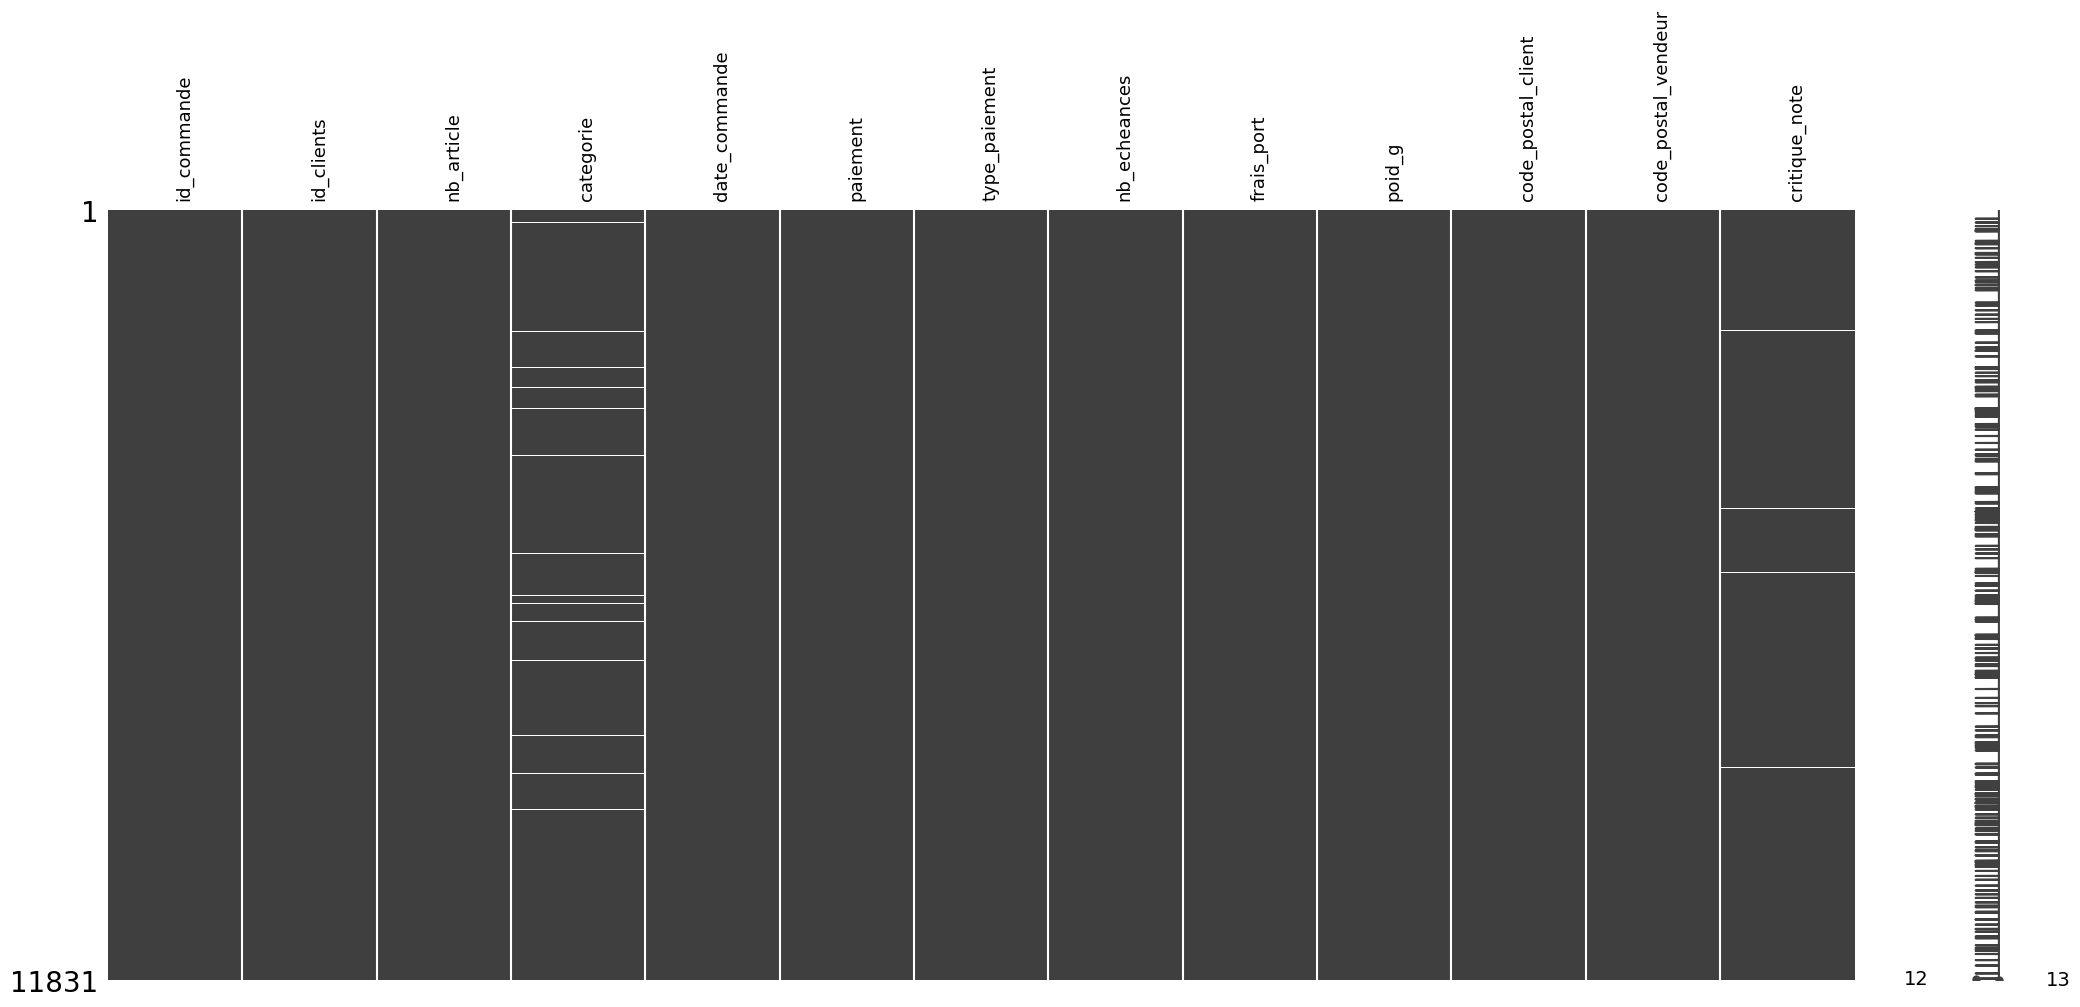

In [62]:
clean.vm(df,0.1,'/content/Fichier_N1/P5_N1_20.png')

In [63]:
#clean.vm(df_geo,0.1,'/content/Fichier_N1/P5_N1_20b.png')

## <a name="C21"> 2.1 Variables qualitatives </a>

In [64]:
df_qual = df.dtypes[df.dtypes == 'object']
df_qual

id_commande            object
id_clients             object
categorie              object
type_paiement          object
code_postal_client     object
code_postal_vendeur    object
dtype: object

- ### id_clients

In [65]:
df['id_clients'].str.len()

0         32
1         32
2         32
3         32
4         32
          ..
118305    32
118306    32
118307    32
118308    32
118309    32
Name: id_clients, Length: 118310, dtype: int64

In [66]:
df['id_clients'].str.len().describe()

count    118310.0
mean         32.0
std           0.0
min          32.0
25%          32.0
50%          32.0
75%          32.0
max          32.0
Name: id_clients, dtype: float64

Tous les identifiants clients ont une longueur de 32 caractères.

In [67]:
#Recherche valeurs abbérantes 
df[df['id_clients'].str.len() !=32]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note


- ### id_commande

In [68]:
df['id_commande'].str.len().describe()

count    118310.0
mean         32.0
std           0.0
min          32.0
25%          32.0
50%          32.0
75%          32.0
max          32.0
Name: id_commande, dtype: float64

In [69]:
#Recherche valeurs abbérantes 
df[df['id_commande'].str.len() !=32]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note


- ### catégorie

In [70]:
df['categorie'].unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery', 'multiple',
       'industry_commerce_and_business', 'watches_gifts', 'auto', None,
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tool

In [71]:
df['categorie'] = df['categorie'].str.upper()
df['categorie'] = df['categorie'].str.strip()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id_commande          118310 non-null  object        
 1   id_clients           118310 non-null  object        
 2   nb_article           118310 non-null  int64         
 3   categorie            116579 non-null  object        
 4   date_commande        118310 non-null  datetime64[ns]
 5   paiement             118307 non-null  float64       
 6   type_paiement        118307 non-null  object        
 7   nb_echeances         118307 non-null  float64       
 8   frais_port           118310 non-null  float64       
 9   poid_g               118310 non-null  float64       
 10  code_postal_client   118310 non-null  object        
 11  code_postal_vendeur  118310 non-null  object        
 12  critique_note        117332 non-null  float64       
dtypes: datetime64[

- ### type_paiement


L'ensemble des commandes payées avec plusieurs type de moyen de paiement. 

---

Ces commandes représentent 5% du dataset, sans compter que les doublons n'ont pas été traités à ce stade. 

In [73]:
df['type_paiement'].unique()

array(['credit_card', 'boleto', 'multiple', 'debit_card', 'voucher', None],
      dtype=object)

In [74]:
df[df['type_paiement'].isna()]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note
88637,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,3,HEALTH_BEAUTY,2016-09-15,NaN,None,NaN,8.49,3000.0,14600,81810,1.0
88638,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,3,HEALTH_BEAUTY,2016-09-15,NaN,None,NaN,8.49,3000.0,14600,81810,1.0
88639,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,3,HEALTH_BEAUTY,2016-09-15,NaN,None,NaN,8.49,3000.0,14600,81810,1.0


- ### Les features de type dates

In [75]:
feat_date = df.dtypes[df.dtypes == 'datetime64[ns]'].index
feat_date

Index(['date_commande'], dtype='object')

29.9% des dates de livraisons sont plus avancées que les dates de confirmationd de la commande... Je ne suis pas sûre que les features de date de livraison et date de commande soient fiables. 

De plus, les date de 'review' ou 'critique' rencontrent le même problème avec 10% des individus (les dates de réponse sont antérieur à la date de la première critique)

In [76]:
df['date_commande'].min()

Timestamp('2016-02-10 00:00:00')

In [77]:
df['date_commande'].max()

Timestamp('2018-12-08 00:00:00')

In [78]:
df[df['date_commande'].isna()]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note


Pour 8 individus, la date de livraison est manquante alors que le statut de la commande est "delivered".

Je fais le choix pour une première itération de supprimer les features de dates :

- ### Nettoyage table *df_geo* 

In [79]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [80]:
df_geo['geolocation_state'].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [81]:
df_geo['geolocation_city'] = df_geo['geolocation_city'].str.upper()
#Mettre le nom des villes en majuscules

In [82]:
repl ='_'
pattern = r'\s'
df_geo['geolocation_city'] = df_geo['geolocation_city'].str.replace(pattern, repl)

#Remplacer les espaces par des underscore

In [83]:
df_geo['geolocation_city']= df_geo['geolocation_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
#Suppresion des accents 

In [84]:
repl ='_'
pattern = r'-'
df_geo['geolocation_city'] = df_geo['geolocation_city'].str.replace(pattern, repl)
#Remplacement du tiret du 6 par l'underscore

In [85]:
repl =''
pattern = r'\W'
df_geo['geolocation_city'] = df_geo['geolocation_city'].str.replace(pattern, repl)
#Suppression de tous les caractères spéciaux 

In [86]:
repl =''
pattern = r'\d'
df_geo['geolocation_city'] = df_geo['geolocation_city'].str.replace(pattern, repl)
#Suppression des chiffres 

In [87]:
df_geo[df_geo['geolocation_city'].str.contains('\d', regex=True)]
#Plus aucune des lignes n'a de caractères spéciaux ou de chiffres 

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [88]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,SAO_PAULO,SP
1,1046,-23.546081,-46.644820,SAO_PAULO,SP
2,1046,-23.546129,-46.642951,SAO_PAULO,SP
3,1041,-23.544392,-46.639499,SAO_PAULO,SP
4,1035,-23.541578,-46.641607,SAO_PAULO,SP


## <a name="C22"> 2.2 Variables quantitatives </a>

In [89]:
df.describe()

,nb_article,paiement,nb_echeances,frais_port,poid_g,critique_note
count,118310.000000,118307.000000,118307.000000,118310.000000,118310.000000,117332.000000
mean,1.393086,355.968123,2.980001,27.283282,2920.043589,4.031390
std,1.110261,1595.849402,2.793780,32.847779,6723.168482,1.387994
min,1.000000,9.590000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,67.890000,1.000000,14.300000,350.000000,4.000000
50%,1.000000,127.000000,2.000000,18.160000,860.000000,5.000000
75%,1.000000,258.670000,4.000000,29.300000,2500.000000,5.000000
max,21.000000,109312.640000,24.000000,1794.960000,184400.000000,5.000000


- ### poid_g

Poid nul, impossible, valeur abbérantes remplacée par **np.nan**.

In [90]:


df.loc[df['poid_g']==0, 'poid_g'] = np.nan

In [91]:
df.loc[df['poid_g']==df['poid_g'].max()]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note
71273,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0
71274,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0
71275,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0
71276,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0
71277,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0
71278,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0
71279,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0
71280,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0
71281,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0
71282,9aec4e1ae90b23c7bf2d2b3bfafbd943,3d47f4368ccc8e1bb4c4a12dbda7111b,10,OFFICE_FURNITURE,2017-02-10,22346.6,credit_card,10.0,354.76,184400.0,04011,08577,1.0


- ### nb_échéances

Nombre d'échéances ne peut pas être inférieur à 1. 
je remplace donc par 1 les valeurs pour les trois individus dont l'échéance est fixée à 0.

In [92]:
df[df['nb_echeances'] < 1]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note
12139,1a57108394169c0b47d8f876acc9ba2d,9925e1d7dff0d807355599dee04830ab,2,HOUSEWARES,2018-05-15,259.88,credit_card,0.0,46.56,1000.0,44001,31573,5.0
12140,1a57108394169c0b47d8f876acc9ba2d,9925e1d7dff0d807355599dee04830ab,2,HOUSEWARES,2018-05-15,259.88,credit_card,0.0,46.56,1000.0,44001,31573,5.0
53921,744bade1fcf9ff3f31d860ace076d422,f54cea27c80dc09bfe07b1cf1e01b845,1,TELEPHONY,2018-04-22,58.69,credit_card,0.0,12.79,128.0,05263,14401,5.0


In [93]:
df.loc[df['nb_echeances'] <1, 'nb_echeances'] = 1

- ### paiement 



In [94]:
df[df['paiement']== df['paiement'].max()] 

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note
1699,03caa2c082116e1d31e67e9ae3700499,0a0a92112bd4c708ca5fde585afaa872,8,FIXED_TELEPHONY,2017-09-29,109312.64,credit_card,1.0,224.08,6000.0,20080,03667,1.0
1700,03caa2c082116e1d31e67e9ae3700499,0a0a92112bd4c708ca5fde585afaa872,8,FIXED_TELEPHONY,2017-09-29,109312.64,credit_card,1.0,224.08,6000.0,20080,03667,1.0
1701,03caa2c082116e1d31e67e9ae3700499,0a0a92112bd4c708ca5fde585afaa872,8,FIXED_TELEPHONY,2017-09-29,109312.64,credit_card,1.0,224.08,6000.0,20080,03667,1.0
1702,03caa2c082116e1d31e67e9ae3700499,0a0a92112bd4c708ca5fde585afaa872,8,FIXED_TELEPHONY,2017-09-29,109312.64,credit_card,1.0,224.08,6000.0,20080,03667,1.0
1703,03caa2c082116e1d31e67e9ae3700499,0a0a92112bd4c708ca5fde585afaa872,8,FIXED_TELEPHONY,2017-09-29,109312.64,credit_card,1.0,224.08,6000.0,20080,03667,1.0
1704,03caa2c082116e1d31e67e9ae3700499,0a0a92112bd4c708ca5fde585afaa872,8,FIXED_TELEPHONY,2017-09-29,109312.64,credit_card,1.0,224.08,6000.0,20080,03667,1.0
1705,03caa2c082116e1d31e67e9ae3700499,0a0a92112bd4c708ca5fde585afaa872,8,FIXED_TELEPHONY,2017-09-29,109312.64,credit_card,1.0,224.08,6000.0,20080,03667,1.0
1706,03caa2c082116e1d31e67e9ae3700499,0a0a92112bd4c708ca5fde585afaa872,8,FIXED_TELEPHONY,2017-09-29,109312.64,credit_card,1.0,224.08,6000.0,20080,03667,1.0


In [95]:
df = df[~(df['paiement']==0)] #Suppression des individus 

- ### frais de port

Pas de valeurs abbérantes. Les frais de port peuvent être parfois offerts. Les frais max s'élèvent à 1794,96 real(soit 328,6 euros) pour une commande 112kg, contenant 6 articles. 


In [96]:
df[df['frais_port'] == df['frais_port'].max()]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note
95952,cf4659487be50c0c317cff3564c4a840,fff5eb4918b2bf4b2da476788d42051c,6,SIGNALING_AND_SECURITY,2018-02-07,17069.76,boleto,1.0,1794.96,112200.0,58407,07113,5.0
95953,cf4659487be50c0c317cff3564c4a840,fff5eb4918b2bf4b2da476788d42051c,6,SIGNALING_AND_SECURITY,2018-02-07,17069.76,boleto,1.0,1794.96,112200.0,58407,07113,5.0
95954,cf4659487be50c0c317cff3564c4a840,fff5eb4918b2bf4b2da476788d42051c,6,SIGNALING_AND_SECURITY,2018-02-07,17069.76,boleto,1.0,1794.96,112200.0,58407,07113,5.0
95955,cf4659487be50c0c317cff3564c4a840,fff5eb4918b2bf4b2da476788d42051c,6,SIGNALING_AND_SECURITY,2018-02-07,17069.76,boleto,1.0,1794.96,112200.0,58407,07113,5.0
95956,cf4659487be50c0c317cff3564c4a840,fff5eb4918b2bf4b2da476788d42051c,6,SIGNALING_AND_SECURITY,2018-02-07,17069.76,boleto,1.0,1794.96,112200.0,58407,07113,5.0
95957,cf4659487be50c0c317cff3564c4a840,fff5eb4918b2bf4b2da476788d42051c,6,SIGNALING_AND_SECURITY,2018-02-07,17069.76,boleto,1.0,1794.96,112200.0,58407,07113,5.0


- ### Table *df_geo*, valeurs abbérantes

In [97]:
df_geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [98]:
df_geo[df_geo['geolocation_lat'] == df_geo['geolocation_lat'].max()]  
#Valeurs abbérantes, lattitude et longitude sont interverties !



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
727755,57319,45.065933,9.341528,PAU_DARCO,AL


Les limites du brésil sont :

*   (5°16'10" N to 33°45'03" S latitude)
*   (34°47'35" W to 73°58'59" W longitude)


---





```
max_lat = 5
min_lat = -34

min_lng = -73
max_lng = -34
```






In [99]:
max_lat = 5
min_lat = -34
min_lng = -73
max_lng = -34
#df_geo[(df_geo['geolocation_lat'] > max_lat ) | ( df_geo['geolocation_lat'] < min_lat) ]

In [100]:
#df_geo[(df_geo['geolocation_lng'] > max_lng ) | ( df_geo['geolocation_lng'] < min_lng) ]

In [101]:
errlng = len(df_geo[(df_geo['geolocation_lng'] > max_lng ) | ( df_geo['geolocation_lng'] < min_lng) ])
errlat = len(df_geo[(df_geo['geolocation_lat'] > max_lat ) | ( df_geo['geolocation_lat'] < min_lat) ])

In [102]:
print('les individus aux coordonnées gps abbérantes représentent', round((max(errlng,errlat)/len(df_geo))*100,6), '% du dataframe df_geo')

les individus aux coordonnées gps abbérantes représentent 0.003699 % du dataframe df_geo


Démarche : il y a environ 1M de villes répertorié dans la table df_geo. Dont, une quarantaine d'individus qui ont des coordonnées de géolocalisation abbérantes. 

Je décide de les éliminer. Ils représentent 0.003699 % de la table df_geo.

In [103]:
indlng = df_geo[(df_geo['geolocation_lng'] > max_lng ) | ( df_geo['geolocation_lng'] < min_lng)].index
df_geo = df_geo.drop(indlng)
indlat = df_geo[(df_geo['geolocation_lat'] > max_lat ) | ( df_geo['geolocation_lat'] < min_lat) ].index
df_geo = df_geo.drop(indlat)

## <a name="C23"> 2.3 Traitement des doublons </a>

In [104]:
df.columns

Index(['id_commande', 'id_clients', 'nb_article', 'categorie', 'date_commande',
       'paiement', 'type_paiement', 'nb_echeances', 'frais_port', 'poid_g',
       'code_postal_client', 'code_postal_vendeur', 'critique_note'],
      dtype='object')

In [105]:
df[df.duplicated(['id_commande'],keep = False)]
#vérification OK : les individus sélectionnés sont totalement identiques à leurs doublons

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note
13,0008288aa423d2a3f00fcb17cd7d8719,9e4159995424971423b98c4a8bc11529,2,GARDEN_TOOLS,2018-02-13,253.08,boleto,1.0,26.74,3300.0,06600,15025,5.0
14,0008288aa423d2a3f00fcb17cd7d8719,9e4159995424971423b98c4a8bc11529,2,GARDEN_TOOLS,2018-02-13,253.08,boleto,1.0,26.74,3300.0,06600,15025,5.0
32,00143d0f86d6fbd9f9b38ab440ac16f5,bb8a37225e0279ac8a274c9765617eaf,3,SPORTS_LEISURE,2017-10-16,327.87,credit_card,1.0,45.30,540.0,74663,18055,NaN
33,00143d0f86d6fbd9f9b38ab440ac16f5,bb8a37225e0279ac8a274c9765617eaf,3,SPORTS_LEISURE,2017-10-16,327.87,credit_card,1.0,45.30,540.0,74663,18055,NaN
34,00143d0f86d6fbd9f9b38ab440ac16f5,bb8a37225e0279ac8a274c9765617eaf,3,SPORTS_LEISURE,2017-10-16,327.87,credit_card,1.0,45.30,540.0,74663,18055,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118295,fff8287bbae429a99bb7e8c21d151c41,028c09f007292c4e3a3b10d296e47987,2,COMPUTERS_ACCESSORIES,2018-03-17,912.56,credit_card,4.0,96.28,350.0,58075,12327,5.0
118300,fffb9224b6fc7c43ebb0904318b10b5f,f736308cd9952b33b90b9fe94da9c8f5,4,WATCHES_GIFTS,2017-10-27,1427.04,boleto,1.0,136.76,1400.0,56912,24440,4.0
118301,fffb9224b6fc7c43ebb0904318b10b5f,f736308cd9952b33b90b9fe94da9c8f5,4,WATCHES_GIFTS,2017-10-27,1427.04,boleto,1.0,136.76,1400.0,56912,24440,4.0
118302,fffb9224b6fc7c43ebb0904318b10b5f,f736308cd9952b33b90b9fe94da9c8f5,4,WATCHES_GIFTS,2017-10-27,1427.04,boleto,1.0,136.76,1400.0,56912,24440,4.0


In [106]:
df = clean.doublon(df,['id_commande'])

Recherche de doublon : il y a  32563 
doublons qui ont la même clé: ['id_commande']


In [107]:
df.shape

(98666, 13)

J'obtiens enfin un dataframe df, avec une ligne par commande !

- ### Aggrégation de la table *df_geo*

In [108]:
df_geo.shape

(1000121, 5)

In [109]:
df_tamp = df_geo.groupby('geolocation_zip_code_prefix')['geolocation_city'].nunique()
df_tamp = df_tamp.reset_index()
df_tamp

,geolocation_zip_code_prefix,geolocation_city
0,1001,1
1,1002,1
2,1003,1
3,1004,1
4,1005,1
...,...,...
19005,99960,1
19006,99965,1
19007,99970,1
19008,99980,1


In [110]:
df_tamp.describe()

,geolocation_zip_code_prefix,geolocation_city
count,19010.000000,19010.000000
mean,42705.532562,1.028406
std,30903.692720,0.173264
min,1001.000000,1.000000
25%,12720.250000,1.000000
50%,38225.000000,1.000000
75%,70649.500000,1.000000
max,99990.000000,4.000000


In [111]:
df_tamp[df_tamp['geolocation_city'] >1]

,geolocation_zip_code_prefix,geolocation_city
159,1307,2
1094,3203,2
1661,4004,2
1777,4132,2
1965,4346,2
...,...,...
18334,95272,2
18380,95588,2
18548,96222,2
18630,96859,2


In [112]:
df_tamp = df_tamp[df_tamp['geolocation_city']>1]
ls_geo_zip = df_tamp['geolocation_zip_code_prefix'].values.tolist()
len(ls_geo_zip)

519

In [113]:
##Agrégation des villes par Zip_code, un zip_code correspond désormais à une ville. 
for zipcode in ls_geo_zip:
  city_count = df_geo[(df_geo['geolocation_zip_code_prefix']==zipcode)].geolocation_city.value_counts()
  city_count = city_count.reset_index()
  city_count = city_count.rename(columns = {'index' : 'city', 'geolocation_city' : 'compte'})
  city_mode = city_count.loc[0,'city']
  df_geo.loc[df_geo['geolocation_zip_code_prefix']==zipcode, 'geolocation_city'] = city_mode

In [114]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,SAO_PAULO,SP
1,1046,-23.546081,-46.644820,SAO_PAULO,SP
2,1046,-23.546129,-46.642951,SAO_PAULO,SP
3,1041,-23.544392,-46.639499,SAO_PAULO,SP
4,1035,-23.541578,-46.641607,SAO_PAULO,SP


In [115]:
df_geo['geolocation_state'].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [116]:
df_new_geo = df_geo.groupby('geolocation_zip_code_prefix').mean()
df_new_geo= df_new_geo.reset_index()
df_new_geo


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19005,99960,-27.953722,-52.025511
19006,99965,-28.183372,-52.039850
19007,99970,-28.343766,-51.874689
19008,99980,-28.389129,-51.843836


In [117]:
df_new_geo = df_new_geo.merge(df_geo[['geolocation_zip_code_prefix', 'geolocation_city',	
                         'geolocation_state']], how = 'left', on = 'geolocation_zip_code_prefix')

In [118]:
df_new_geo = clean.doublon(df_new_geo, ['geolocation_zip_code_prefix'])

Recherche de doublon : il y a  999079 
doublons qui ont la même clé: ['geolocation_zip_code_prefix']


Je retombe bien sur une table contenant les 19015 zip code prefixes. Chaque ligne correspond à un code, à des coordonnées moyennes, la ville principale et l'état. 

In [119]:
df_new_geo = df_new_geo.sort_values('geolocation_zip_code_prefix')
df_new_geo = df_new_geo.reset_index(drop=True)
df_new_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,SAO_PAULO,SP
1,1002,-23.548146,-46.634979,SAO_PAULO,SP
2,1003,-23.548994,-46.635731,SAO_PAULO,SP
3,1004,-23.549799,-46.634757,SAO_PAULO,SP
4,1005,-23.549456,-46.636733,SAO_PAULO,SP
...,...,...,...,...,...
19005,99960,-27.953722,-52.025511,CHARRUA,RS
19006,99965,-28.183372,-52.039850,AGUA_SANTA,RS
19007,99970,-28.343766,-51.874689,CIRIACO,RS
19008,99980,-28.389129,-51.843836,DAVID_CANABARRO,RS


In [120]:
df_new_geo.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [121]:
df_geo = df_new_geo
df_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,SAO_PAULO,SP
1,1002,-23.548146,-46.634979,SAO_PAULO,SP
2,1003,-23.548994,-46.635731,SAO_PAULO,SP
3,1004,-23.549799,-46.634757,SAO_PAULO,SP
4,1005,-23.549456,-46.636733,SAO_PAULO,SP
...,...,...,...,...,...
19005,99960,-27.953722,-52.025511,CHARRUA,RS
19006,99965,-28.183372,-52.039850,AGUA_SANTA,RS
19007,99970,-28.343766,-51.874689,CIRIACO,RS
19008,99980,-28.389129,-51.843836,DAVID_CANABARRO,RS


In [122]:
for i, it in df_geo['geolocation_zip_code_prefix'].items():
  df_geo.loc[i,'geolocation_zip_code_prefix'] = str(it)

df_tamp = df_geo[df_geo['geolocation_zip_code_prefix'].str.len() == 4]
for i, it in df_tamp['geolocation_zip_code_prefix'].items():
  df_geo.loc[i, 'geolocation_zip_code_prefix'] = '0'+it

In [123]:
#Vérification OK - tous les prefixes ont une longueur = 5
df_geo[df_geo['geolocation_zip_code_prefix'].str.len()!=5]


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [124]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19010 entries, 0 to 19009
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19010 non-null  object 
 1   geolocation_lat              19010 non-null  float64
 2   geolocation_lng              19010 non-null  float64
 3   geolocation_city             19010 non-null  object 
 4   geolocation_state            19010 non-null  object 
dtypes: float64(2), object(3)
memory usage: 742.7+ KB


In [125]:
df_geo = df_geo.sort_values('geolocation_zip_code_prefix')

In [126]:
#Vérification OK, seul les codes postaux vendeur multiples 
df[df['code_postal_client'].str.len()!=5]
df[df['code_postal_vendeur'].str.len()!=5]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note
78429,a9f77c0325604197d9a0048d0dcad33f,ef4cc585e97f73505a50eb3884741edd,2,BABY,2018-07-24,157.34,boleto,1.0,31.78,650.0,06150,+37410+87120,5.0
78207,a98012aa8c697f2bcff9f8c2183e0f2b,43da534e5e6c052df9993df486f342b6,5,MULTIPLE,2018-05-13,794.85,credit_card,3.0,79.15,750.0,30570,+01129+13324+29100,1.0
78232,a994ff8265aed38e21cb63b2d8402b09,ff8eddc3ff272a5724e2ac6635cb7df2,2,WATCHES_GIFTS,2018-01-07,1983.48,credit_card,8.0,65.74,750.0,78600,+11900+30315,3.0
79012,ab2a998670fda3ed78ed05b73fa62ef9,f46b6397d5e7eeb53c40c51880238687,2,MULTIPLE,2017-11-11,436.44,credit_card,1.0,34.79,8900.0,04675,+13908+38400,3.0
78984,ab1a70d5cd14419a6f2c2aca5ee8a79b,82ddb85c2420994d709ee21503e44eb8,4,MULTIPLE,2018-04-20,2456.84,boleto,1.0,65.51,22333.0,12929,+03809+08577+13322,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52508,7133741ec73ad73f2b0df0078f3dff59,959dc8ab795a2d3738f8a16e36411b48,2,HOUSEWARES,2018-06-21,220.68,credit_card,3.0,24.44,1050.0,05638,+07600+81210,NaN
47485,6679781bbd182ebad33a3393741e6334,5400394e71d0e31eff5a35aa40fb26ac,2,FURNITURE_DECOR,2018-02-26,180.48,credit_card,5.0,23.44,1300.0,05782,+09715+31565,NaN
77063,a722dd5ab3a3cf4065a47d75a502fdab,8418b8ecfc9702b5eacddc5e75a4dcca,2,COMPUTERS_ACCESSORIES,2018-02-04,453.40,credit_card,6.0,44.70,387.0,37464,+87025+87047,NaN
65480,8e084e8efad16f27d7f26e71af985ce2,79f227df52caf2b68d36e990ff3fc652,2,BED_BATH_TABLE,2018-07-03,362.80,credit_card,8.0,41.51,1500.0,27700,+13405+14940,NaN


In [127]:
df = df.merge(df_geo, how = 'left', left_on = 'code_postal_client', right_on = 'geolocation_zip_code_prefix')

In [128]:
df = df.drop(columns = 'geolocation_zip_code_prefix')
mapp = {'geolocation_lat': 'lat_client',
        'geolocation_lng': 'lng_client',
        'geolocation_city' : 'ville_client', 
        'geolocation_state': 'etat_client'}
df = df.rename(columns = mapp)

In [129]:
for i, it in df['lat_client'].items():
  df.loc[i,'lat_client'] = float(it)

for i, it in df['lng_client'].items():
  df.loc[i,'lng_client'] = float(it)

In [130]:
for i, it in df_geo['geolocation_lat'].items():
  df_geo.loc[i,'geolocation_lat'] = float(it)

for i, it in df_geo['geolocation_lng'].items():
  df_geo.loc[i,'geolocation_lng'] = float(it)

In [131]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 0 to 19009
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19010 non-null  object 
 1   geolocation_lat              19010 non-null  float64
 2   geolocation_lng              19010 non-null  float64
 3   geolocation_city             19010 non-null  object 
 4   geolocation_state            19010 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


- ### Code_postale_vendeur, données géo pour des codes multiples 

In [132]:
#df_tamp = df[df['code_postal_vendeur']!= 5]


#df = df.merge(df_geo, how = 'left', left_on = 'code_postal_vendeur', right_on = 'geolocation_zip_code_prefix')

In [133]:
#df = df.drop(columns = 'geolocation_zip_code_prefix')
#mapp = {'geolocation_lat': 'lat_vendeur',
  #      'geolocation_lng': 'lng_vendeur',
      #  'geolocation_city' : 'ville_vendeur',
       # 'geolocation_state': 'etat_vendeur'}
#df = df.rename(columns = mapp)

In [134]:
df

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,1,COOL_STUFF,2017-09-13,72.19,credit_card,2.0,13.29,650.0,28013,27277,5.0,-21.762775,-41.309633,CAMPOS_DOS_GOYTACAZES,RJ
1,a9eff8f70def39eb9133c1861c49ee76,a9ffffcb3c269896e73079f05db657a1,1,CINE_PHOTO,2017-09-15,102.84,credit_card,2.0,33.84,5500.0,13232,89228,5.0,-23.211746,-46.762875,CAMPO_LIMPO_PAULISTA,SP
2,a9ef90b7e8572edf6aa35360c03236e5,3b757b2d4351aae134b2f7e7bb9b156a,1,STATIONERY,2018-08-18,66.44,debit_card,1.0,16.54,700.0,13468,21840,5.0,-22.754938,-47.349404,AMERICANA,SP
3,a9ef87f686349168d7b25621bac29d5e,2da15ef83ce8831c824aa43f2af3eff1,1,DRINKS,2018-09-01,57.43,credit_card,1.0,9.94,175.0,06690,11701,4.0,-23.528253,-46.948197,ITAPEVI,SP
4,a9eee8decd3e1383ae72091607768f03,a856637b6dd58cf71bfbf7b6a21d8d84,1,COMPUTERS_ACCESSORIES,2018-07-21,142.27,debit_card,1.0,22.77,200.0,21380,87030,5.0,-22.883318,-43.319512,RIO_DE_JANEIRO,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,415cfaaaa8cea49f934470548797fed1,cd63fb1b20b66ae7f91f848942895493,2,None,2017-02-04,174.08,credit_card,1.0,29.04,NaN,86709,12327,5.0,-23.411346,-51.456942,ARAPONGAS,PR
98662,6cfa5243a13a7ea9c5b37fba140d4f9d,5accfe1e65e8ded17c514e63f3499668,1,None,2018-07-03,140.56,credit_card,4.0,17.57,400.0,78053,07133,NaN,-15.584021,-56.052602,CUIABA,MT
98663,d38dcb503cd4ddc6ce7702552918bd8f,2eab2d0ae1015e2e7fb2062f465f524f,2,None,2017-04-06,216.40,credit_card,4.0,30.20,NaN,91920,12327,5.0,-30.111751,-51.243896,PORTO_ALEGRE,RS
98664,eb855beb3ac99461f7a076b4c3652472,4e78d9253ba5cc1d990eb09ea45a3a2c,1,None,2017-03-23,43.52,credit_card,4.0,14.52,NaN,39408,12327,1.0,-16.727573,-43.886130,MONTES_CLAROS,MG


# <a name="C3"> 3. Valeurs manquantes et agrégation de la table *df*</a>


## <a name="C31">3.1 Imputations des valeurs manquantes </a>

id_commande            0.000000
id_clients             0.000000
nb_article             0.000000
categorie              0.014291
date_commande          0.000000
paiement               0.000010
type_paiement          0.000010
nb_echeances           0.000010
frais_port             0.000000
poid_g                 0.000223
code_postal_client     0.000000
code_postal_vendeur    0.000000
critique_note          0.007591
lat_client             0.002787
lng_client             0.002787
ville_client           0.002787
etat_client            0.002787
dtype: float64

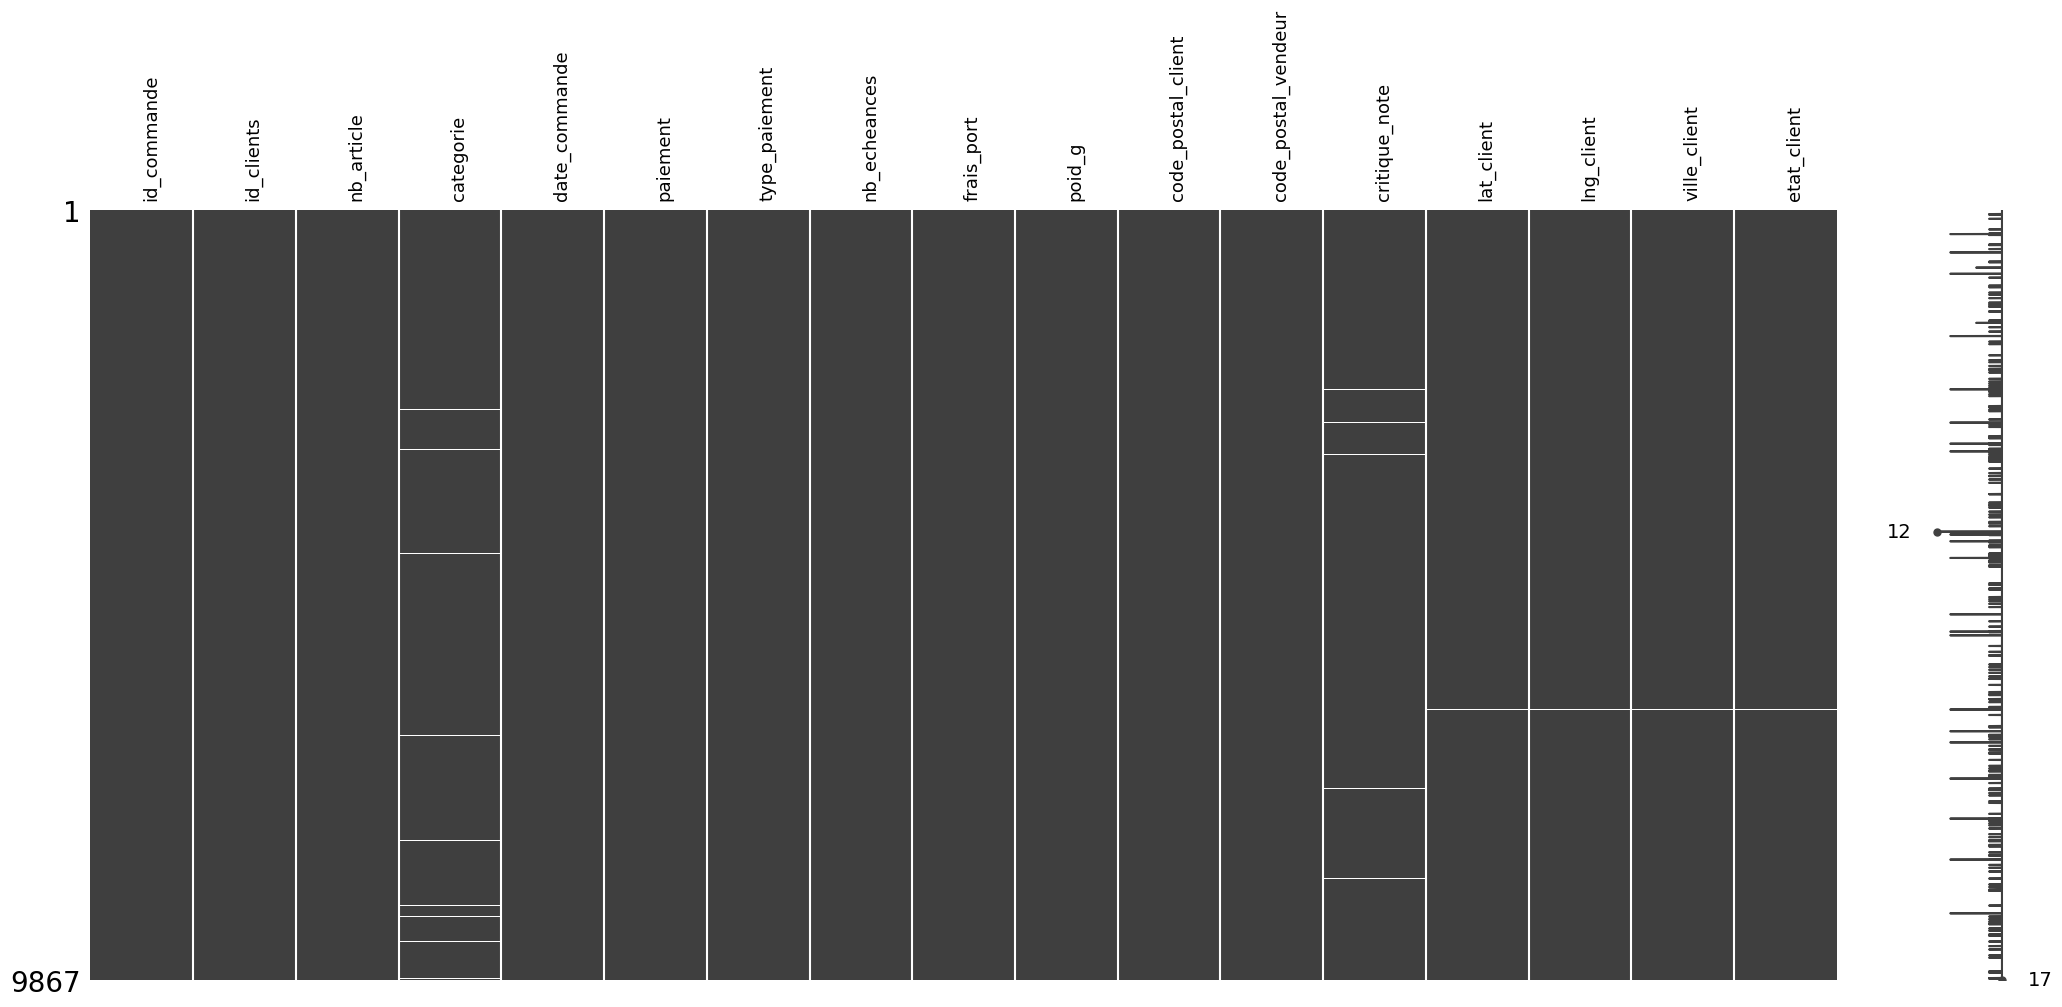

In [135]:
clean.vm(df,0.1,'/content/Fichier_N1/P5_N1_3.png')

In [136]:
df.loc[df['categorie'].isna(), 'categorie'] = 'OTHER'

In [137]:
df.isna().sum()

id_commande              0
id_clients               0
nb_article               0
categorie                0
date_commande            0
paiement                 1
type_paiement            1
nb_echeances             1
frais_port               0
poid_g                  22
code_postal_client       0
code_postal_vendeur      0
critique_note          749
lat_client             275
lng_client             275
ville_client           275
etat_client            275
dtype: int64

In [138]:
#Suppression de l'individu sans paiement et sans nb_echéances
df = df[~df['paiement'].isna()]

In [139]:
#Imputation des vm critique_note 
df.loc[df['critique_note'].isna(), 'critique_note'] = 'Sans note'

In [140]:
df[df['etat_client'].isna()]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client
454,aadf11ab8b56726ef2e1f9967929acab,c5ae51741ef98f82fbb3887f0bb68877,1,PET_SHOP,2017-12-15,146.43,credit_card,1.0,36.43,2200.0,72595,31842,5.0,NaN,NaN,NaN,NaN
732,a94b962669c74fd01d87a94aefd3eeff,c85df1c6ef6f7bb605e1c49d34f172ee,1,GARDEN_TOOLS,2017-09-12,78.65,voucher,1.0,19.65,1650.0,78554,15025,3.0,NaN,NaN,NaN,NaN
1120,a7a9b0f583c7121452bf658dafcbbc8f,481a3e4c07971c950ac25f7317ac421b,1,WATCHES_GIFTS,2018-10-07,621.78,credit_card,8.0,26.88,300.0,65137,13170,1.0,NaN,NaN,NaN,NaN
1240,a92cfc44e62b26e5bda2aeb39b0e0217,69b09832dc41358029209b44f47854ff,1,HEALTH_BEAUTY,2018-03-28,154.83,credit_card,3.0,34.83,3500.0,58286,04782,5.0,NaN,NaN,NaN,NaN
2107,ae78d443f07cc7da4cb961f34f1bc6a8,41db2509d2fd3e2fe68e88deedaa0c1b,1,TELEPHONY,2017-08-31,190.66,credit_card,2.0,16.66,450.0,59299,42738,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96966,207ea151b652a5aa335e64d908d9e0ed,a0b900ce3e523b7ded323e9b60c49cf9,1,OTHER,2018-07-15,35.83,credit_card,1.0,17.93,1600.0,73091,03471,2.0,NaN,NaN,NaN,NaN
97351,a66765fe402323e56c6304674dea53ec,5468c19d0df121d47a5d3dc792f6cf52,1,OTHER,2017-09-09,55.69,credit_card,1.0,15.79,200.0,72863,31030,2.0,NaN,NaN,NaN,NaN
97591,a5ab32d92df4aa22033de78a4c20dedb,b6720c884c4f70869b4536cad535a264,1,OTHER,2017-12-27,138.60,boleto,1.0,15.61,400.0,84623,07133,4.0,NaN,NaN,NaN,NaN
97833,c8ccac7f59cb2c602959eb4586aa9b15,ebfe9b42d73c997a677f615bf7116f18,1,OTHER,2017-12-18,137.60,boleto,1.0,14.61,400.0,71810,07133,1.0,NaN,NaN,NaN,NaN


- ### Imputation des données de géolocalisation 

In [141]:
#! pip install Distance
#import distance

In [142]:
! pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
from Levenshtein import ratio #distance,  hamming, jaro_winkler

Imputation des features de geolocalisation de proche en proche, en fonction du prefixes zip code et de la distance textuelle de levenshtein. 
Deux zipcode proches sont égelement proche dans l'espace (cf. la définition des zip code Brésilien plus haut)

In [144]:
#Test 
ratio('41098'[:3], '31200'[:3])

0.33333333333333337

In [145]:
def imput_geo (taux_dis, chaine): #taux_dis est la distance textuelle max pour associer un zip code à un autre 
                                  # chaine : string soit 'client' soit 'vendeur'
  ls_zip = df_geo['geolocation_zip_code_prefix'].values.tolist()
  df_tamp = df[df['lat_'+chaine].isna()]
  for i,it in df_tamp.code_postal_client.items():
    df_geo_tamp = df_geo[df_geo['geolocation_zip_code_prefix'].str.startswith(it[:3])]
    ls_geo = df_geo_tamp['geolocation_zip_code_prefix'].values.tolist()
    ls_geo.sort()
    for geo in ls_geo:
      dis =ratio(it[:3], geo[:3])
      if dis >= taux_dis:
        df.loc[i, 'lat_'+chaine] = df_geo.loc[df_geo['geolocation_zip_code_prefix']==geo, 'geolocation_lat'].values
        df.loc[i, 'lng_'+chaine] = df_geo.loc[df_geo['geolocation_zip_code_prefix']==geo, 'geolocation_lng'].values
        df.loc[i, 'ville_'+chaine] = df_geo.loc[df_geo['geolocation_zip_code_prefix']==geo, 'geolocation_city'].values
        df.loc[i, 'etat_'+chaine] = df_geo.loc[df_geo['geolocation_zip_code_prefix']==geo, 'geolocation_state'].values
        df.loc[i, 'code_postal_'+chaine] = geo
        break

In [146]:
imput_geo(0.85,'client')

In [147]:
imput_geo(0.7,'client')

In [148]:
df[df['lat_client'].isna()]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client
40036,c1961b98e4fd21637c3d46794c5ecd19,08f39bc6b746bc26013fa99b725e83e6,5,BED_BATH_TABLE,2018-03-05,2026.65,credit_card,5.0,120.44,4850.0,41098,14940,3.0,NaN,NaN,NaN,NaN
87780,4cf8e5fafb46ec3ef4e9b76e9eb2bf25,bd315e83bbf6540e7d45fd73b5e41bdd,1,SPORTS_LEISURE,2018-08-21,76.46,credit_card,1.0,18.56,725.0,41098,04461,5.0,NaN,NaN,NaN,NaN


- ### Imputation de la feature 'poids_g'

In [149]:
df[df['poid_g'].isna()]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client
97160,200b121c28e10ef638131a7c76753327,7e518b9896c26844bf24c1802c7d8775,1,BED_BATH_TABLE,2018-04-08,119.89,credit_card,1.0,19.89,NaN,75830,14940,5.0,-17.557091,-52.550320,MINEIROS,GO
97315,476b812a7e4fc972646eb390517bddcb,387207b587c829c6678a03c8b711ae1e,1,BED_BATH_TABLE,2018-08-18,153.61,credit_card,4.0,23.71,NaN,72911,14940,5.0,-15.740320,-48.244279,AGUAS_LINDAS_DE_GOIAS,GO
97460,85f8ad45e067abd694b627859fa57453,69b2b29382af03e03e486ad307a76000,1,BABY,2017-01-29,1961.00,credit_card,10.0,27.00,NaN,90160,86020,5.0,-30.051007,-51.217957,PORTO_ALEGRE,RS
97637,b489f7ae130ba3fd26b0a20f8cc81c61,aaa0fa0d6f239f72e8067326c6a134fa,1,BED_BATH_TABLE,2018-08-18,153.61,credit_card,6.0,23.71,NaN,96360,14940,5.0,-31.866799,-52.821701,PEDRO_OSORIO,RS
97828,4abc7b5330425bcf9c2f7f48151a88c0,93b52b7591ca73fc44cdac70146a1b0d,1,BED_BATH_TABLE,2018-07-31,144.39,credit_card,6.0,14.49,NaN,04904,14940,5.0,-23.673794,-46.737425,SAO_PAULO,SP
98320,06afc1144eb9f51ef2aa90ec9223c7f4,eb8ba0e91b822fefb8d7f0243881647d,2,BED_BATH_TABLE,2018-08-15,614.44,credit_card,10.0,47.42,NaN,89930,14940,3.0,-26.454414,-53.503079,SAO_JOSE_DO_CEDRO,SC
98441,06d9e69034388abf6da64378e10737b8,7dff353845a1d77a928dcb952c6bc966,2,BED_BATH_TABLE,2018-07-30,495.40,credit_card,4.0,47.70,NaN,45653,14940,3.0,-14.799150,-39.034067,ILHEUS,BA
98641,c1424efcde3c9e9febd9e1761667789e,cf5e6a37d7ffef60af859e8025b3112d,1,OTHER,2017-07-04,43.52,boleto,1.0,14.52,NaN,35430,12327,5.0,-20.410060,-42.898817,PONTE_NOVA,MG
98642,595316a07cd3dea9db7adfcc7e247ae7,5c71f03d38ea1426874ace382efa488d,1,OTHER,2017-09-08,48.27,boleto,1.0,9.27,NaN,13190,12327,2.0,-22.944389,-47.295351,MONTE_MOR,SP
98644,1521c6bb7b1028154c8c67cf80fa809f,eabb0c62caa8436a85aa820d2ac1323b,1,OTHER,2017-02-04,45.05,credit_card,4.0,16.05,NaN,73105,12327,5.0,-15.662755,-47.860392,BRASILIA,DF


In [150]:
df_cat_poid = df.groupby('categorie')['poid_g'].median()
df_cat_poid = df_cat_poid.reset_index()
df_cat_poid

,categorie,poid_g
0,AGRO_INDUSTRY_AND_COMMERCE,3000.0
1,AIR_CONDITIONING,2400.0
2,ART,1700.0
3,ARTS_AND_CRAFTMANSHIP,1025.0
4,AUDIO,400.0
...,...,...
68,STATIONERY,1200.0
69,TABLETS_PRINTING_IMAGE,300.0
70,TELEPHONY,250.0
71,TOYS,850.0


In [151]:
#Imputation des valeurs manquantes de poid par le poid médian dans la catégorie correspondante. 
ind = df[df['poid_g'].isna()].index

for i in ind: 
  cat = df.loc[i, 'categorie']
  df.loc[i, 'poid_g'] = df_cat_poid.loc[df_cat_poid['categorie'] == cat, 'poid_g'].values

In [152]:
df.isna().sum()

id_commande            0
id_clients             0
nb_article             0
categorie              0
date_commande          0
paiement               0
type_paiement          0
nb_echeances           0
frais_port             0
poid_g                 0
code_postal_client     0
code_postal_vendeur    0
critique_note          0
lat_client             2
lng_client             2
ville_client           2
etat_client            2
dtype: int64

##  <a name="C32">3.2 Agrégation de la table *df* </a>








In [153]:
! pip install haversine==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Création de la feature *distance*

Pour chaque commande, distance approximative entre le client et le vendeur.



---
Stratégie : Pour chaque commande ayant plusieurs vendeur. Calculer une distance moyenne.

1126 individus sont concernés. 


In [154]:
df[df['code_postal_vendeur'].str.len() != 5]

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client
30,a9f77c0325604197d9a0048d0dcad33f,ef4cc585e97f73505a50eb3884741edd,2,BABY,2018-07-24,157.34,boleto,1.0,31.78,650.0,06150,+37410+87120,5.0,-23.570256,-46.811308,OSASCO,SP
206,a98012aa8c697f2bcff9f8c2183e0f2b,43da534e5e6c052df9993df486f342b6,5,MULTIPLE,2018-05-13,794.85,credit_card,3.0,79.15,750.0,30570,+01129+13324+29100,1.0,-19.958061,-43.978911,BELO_HORIZONTE,MG
326,a994ff8265aed38e21cb63b2d8402b09,ff8eddc3ff272a5724e2ac6635cb7df2,2,WATCHES_GIFTS,2018-01-07,1983.48,credit_card,8.0,65.74,750.0,78600,+11900+30315,3.0,-15.878863,-52.273574,BARRA_DO_GARCAS,MT
471,ab2a998670fda3ed78ed05b73fa62ef9,f46b6397d5e7eeb53c40c51880238687,2,MULTIPLE,2017-11-11,436.44,credit_card,1.0,34.79,8900.0,04675,+13908+38400,3.0,-23.664978,-46.690930,SAO_PAULO,SP
517,ab1a70d5cd14419a6f2c2aca5ee8a79b,82ddb85c2420994d709ee21503e44eb8,4,MULTIPLE,2018-04-20,2456.84,boleto,1.0,65.51,22333.0,12929,+03809+08577+13322,3.0,-22.931953,-46.524043,BRAGANCA_PAULISTA,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97481,7133741ec73ad73f2b0df0078f3dff59,959dc8ab795a2d3738f8a16e36411b48,2,HOUSEWARES,2018-06-21,220.68,credit_card,3.0,24.44,1050.0,05638,+07600+81210,Sans note,-23.607476,-46.740358,SAO_PAULO,SP
97733,6679781bbd182ebad33a3393741e6334,5400394e71d0e31eff5a35aa40fb26ac,2,FURNITURE_DECOR,2018-02-26,180.48,credit_card,5.0,23.44,1300.0,05782,+09715+31565,Sans note,-23.651294,-46.766853,SAO_PAULO,SP
97895,a722dd5ab3a3cf4065a47d75a502fdab,8418b8ecfc9702b5eacddc5e75a4dcca,2,COMPUTERS_ACCESSORIES,2018-02-04,453.40,credit_card,6.0,44.70,387.0,37464,+87025+87047,Sans note,-22.296793,-44.936763,ITANHANDU,MG
98258,8e084e8efad16f27d7f26e71af985ce2,79f227df52caf2b68d36e990ff3fc652,2,BED_BATH_TABLE,2018-07-03,362.80,credit_card,8.0,41.51,1500.0,27700,+13405+14940,Sans note,-22.407673,-43.667690,VASSOURAS,RJ


In [155]:
df_tamp = df[df['code_postal_vendeur'].str.len() != 5]
df_tamp['code_postal_vendeur'] = df_tamp['code_postal_vendeur'].str.split('+')
df_tamp['code_postal_vendeur']

30              [, 37410, 87120]
206      [, 01129, 13324, 29100]
326             [, 11900, 30315]
471             [, 13908, 38400]
517      [, 03809, 08577, 13322]
                  ...           
97481           [, 07600, 81210]
97733           [, 09715, 31565]
97895           [, 87025, 87047]
98258           [, 13405, 14940]
98304           [, 03809, 14940]
Name: code_postal_vendeur, Length: 1126, dtype: object

In [156]:
multi_vendeur = {}
geo_vendeur = {}

In [157]:
def imput_geo2 (taux_dis, code): #taux_dis est la distance textuelle max pour associer un zip code à un autre 
                                  # chaine : string soit 'client' soit 'vendeur'
  ls_zip = df_geo['geolocation_zip_code_prefix'].values.tolist()
  ls_zip.sort()
  code_proche = ''
  for codezip in ls_zip:
    #print(geo)
    dis =ratio(code[:3], codezip[:3]) 
    if dis >= taux_dis:
      #print(dis, code)
      lat = df_geo.loc[df_geo['geolocation_zip_code_prefix']== codezip, 'geolocation_lat'].values
      lng = df_geo.loc[df_geo['geolocation_zip_code_prefix']== codezip, 'geolocation_lng'].values
      code_proche += codezip
      break
  if code_proche =='':
    #print('Pas de code proche !', code, 'relancez la fonction avec un taux_dis plus faible')
    lat = np.nan
    lng = np.nan
  return lat,lng, codezip

In [158]:
#Test fonction imput_geo2 -- OK 
lat, lng, code = imput_geo2 (0.8, '03809')
lat, lng, code

(array([-23.50284763]), array([-46.49002927]), '03801')

In [159]:
#Étape 1 : création du dictionnaire multi_vendeur : à chaque commande correspond une liste de code postaux 
df_tamp = df[df['code_postal_vendeur'].str.len() != 5]
df_tamp['code_postal_vendeur'] = df_tamp['code_postal_vendeur'].str.split('+')
for i, row in df_tamp.iterrows():
  comm = row['id_commande']
  multi_vendeur[comm] = row['code_postal_vendeur'][1:]

#Étape 1 -- OK
#multi_vendeur

In [160]:
#Étape 2 : création du dictionnaire geo_vendeur : à chaque commande correspond les coordonnées géo des codes postaux vendeur 
for i, row in df_tamp.iterrows():
  comm = row['id_commande']
  ls_geo = []
  for code in multi_vendeur[comm]:   
    lat = df_geo.loc[df_geo['geolocation_zip_code_prefix']== code, 'geolocation_lat'].values
    lng = df_geo.loc[df_geo['geolocation_zip_code_prefix']== code, 'geolocation_lng'].values
    if len(lat) != 0:
      coord = np.array([lat, lng]).T
      ls_geo.append(coord)
    else :
      print('code non répertorié',code, comm)
      lat, lng, code_zip = imput_geo2 (0.8,code) #Utilisation de la fonction imput_geo qui obtient le code le plus proche à défaut d'avoir le code exact code
      print(code_zip) #Affichage du code postal le plus proche 
      coord = np.array([lat, lng]).T
      ls_geo.append(coord)
  geo_vendeur[comm] = ls_geo 

#Étape 2 -- OK

code non répertorié 37708 9d302458a5c2070516051da353068870
37701
code non répertorié 91901 2868cec2c0d3cc29873e13a46f55f532
91900
code non répertorié 37708 2480f727e869fdeb397244a21b721b67
37701
code non répertorié 02285 09224348db675e0c2a00ebe2bd9599db
02201


In [161]:
#Exemple -- OK 
geo_vendeur['2480f727e869fdeb397244a21b721b67']

[array([[-20.80670693, -49.38916454]]), array([[-21.78913132, -46.56757074]])]

In [162]:
from haversine import haversine_vector, Unit, haversine

In [163]:
ls_comm = df[df['code_postal_vendeur'].str.len() != 5].id_commande.unique().tolist()
ls_comm 
len(ls_comm)
#ls_comm, répertorie les 1126 commandes approvisionnée par plusieurs vendeurs. 

1126

In [164]:
#test -- OK
com = '2480f727e869fdeb397244a21b721b67'
df.loc[df['id_commande']== com][['lat_client', 'lng_client']].values

array([[-22.36916997, -47.36279348]])

In [165]:
#Étape 3 -- calcul des distance clients-vendeur pour chaque commande approvisionnées par des vendeur multiple
dis_vendeur_multi = {} 
for com in ls_comm:
  coord_client = df.loc[df['id_commande']== com][['lat_client', 'lng_client']].values
  coord_client = tuple(coord_client[0])
  ls_dis = []
  for coord_vendeur in geo_vendeur[com]:
    coord_vendeur = tuple(coord_vendeur[0])
    dis = haversine(coord_client,coord_vendeur, Unit.KILOMETERS)
    ls_dis.append(dis)
  dis_vendeur_multi[com] = ls_dis

#Étape 3 -- OK

In [166]:
#Étape 4 -- Créer la feature distance_km pour toutes les commandes 
df['distance_km'] = np.nan

In [167]:
#Étape 5 -- Calcul des distances moyennes pour le cas des commandes à vendeur multiples 
for com in ls_comm:
  dis_moy = np.mean(dis_vendeur_multi[com])
  df.loc[df['id_commande'] == com, 'distance_km'] = round(dis_moy,1)

In [168]:
#Vérification -- OK
#df[df['code_postal_vendeur'].str.len()!=5]
df[df['code_postal_vendeur'].str.len()!=5].isna().sum() #OK Pas de valeur manquantes 

id_commande            0
id_clients             0
nb_article             0
categorie              0
date_commande          0
paiement               0
type_paiement          0
nb_echeances           0
frais_port             0
poid_g                 0
code_postal_client     0
code_postal_vendeur    0
critique_note          0
lat_client             0
lng_client             0
ville_client           0
etat_client            0
distance_km            0
dtype: int64

In [169]:
df.isna().sum()

id_commande                0
id_clients                 0
nb_article                 0
categorie                  0
date_commande              0
paiement                   0
type_paiement              0
nb_echeances               0
frais_port                 0
poid_g                     0
code_postal_client         0
code_postal_vendeur        0
critique_note              0
lat_client                 2
lng_client                 2
ville_client               2
etat_client                2
distance_km            97539
dtype: int64

In [170]:
#Suppresssion des 2 individus n'ayant pas de code postal client répertorié 
df = df[~df['lat_client'].isna()]

In [171]:
##Étape 6 -- Calcul des distances pour le reste des commandes (avec unique vendeur)
df_tamp = df[~(df['code_postal_vendeur'].str.len()!=5)]
ind = df_tamp.index

for count, i in enumerate(ind):
  code = df.loc[i, 'code_postal_vendeur']
  coord_vendeur = df_geo[df_geo['geolocation_zip_code_prefix'] == code][['geolocation_lat',	'geolocation_lng']].values
  coord_client = df_tamp.loc[i][['lat_client',	'lng_client']].values
  coord_client = np.array([coord_client.astype(np.float)])
  #print(coord_client)
  if len(coord_vendeur) != 0:
    dis_geo = haversine(tuple(coord_client[0]), tuple(coord_vendeur[0]), Unit.KILOMETERS)
    dis_geo
    #print(count,i)
    df.loc[i,'distance_km'] = round(dis_geo,1)
  else : 
    #print(i, 'fix it !', 'Ok, fonction imput_geo2')
    lat, lng, code_zip = imput_geo2(0.8,code) #Utilisation de la fonction imput_geo qui obtient le code le plus proche à défaut d'avoir le code exact code
    df.loc[i, 'code_postal_vendeur'] = code_zip #Remplacement par le code postal le plus proche et répertorié dans df_geo
    coord_vendeur = np.array([lat, lng]).T
    if len(coord_vendeur) != 0:
      dis_geo = haversine(tuple(coord_client[0]), tuple(coord_vendeur[0]), Unit.KILOMETERS)
      dis_geo
      #print(count,i)
      df.loc[i,'distance_km'] = round(dis_geo,1)
    else : 
      print('Attention ! relancer ! avec taux plus grand ')



In [172]:
df[df['critique_note']== 'Sans note']

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client,distance_km
96510,3dc3b3d8c073e795040be5836fdd8691,1a940ff1478eb0d0029d60d6700ee986,1,HEALTH_BEAUTY,2018-01-17,131.16,credit_card,2.0,21.26,2100.0,89687,03702,Sans note,-26.780719,-52.058828,PASSOS_MAIA,SC,662.8
96512,92caa5283abcb12faf71683ba259debd,75b1b1b5afa391cd48c2612a2cef5500,1,SPORTS_LEISURE,2017-03-15,74.49,credit_card,1.0,14.59,200.0,03026,84178,Sans note,-23.531364,-46.611132,SAO_PAULO,SP,371.9
96513,10710544d8adf2b743de71711a372fa2,45789f1b6b6f306de2bd23a22810edc9,1,TELEPHONY,2017-02-24,52.51,boleto,1.0,14.52,150.0,88317,03569,Sans note,-26.889240,-48.738681,ITAJAI,SC,435.4
96515,dd501072091c950a1e6bb5ea9182df2a,0cfe42acc51af3f1b24268032e51bc56,1,SPORTS_LEISURE,2018-12-03,263.23,credit_card,2.0,93.33,15467.0,68795,08577,Sans note,-1.350459,-48.255533,BENEVIDES,PA,2469.8
96517,bb004371887666040d4ca5e0b002bd08,220eab5a5583419cbe92c023d67eb382,1,WATCHES_GIFTS,2018-03-21,69.18,credit_card,2.0,14.19,350.0,08573,24440,Sans note,-23.492082,-46.349937,ITAQUAQUECETUBA,SP,345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98653,e6135c8e8606487b103a6835a5c429ff,f2338b63241a7ff941080e0d5e4b4b80,1,OTHER,2017-08-12,65.00,credit_card,1.0,15.10,600.0,26550,13416,Sans note,-22.770757,-43.431299,MESQUITA,RJ,431.6
98656,acbcf9f01dae9955841ae74fa15840fc,bd91d32da39e118c89f20b3229318d57,2,OTHER,2017-06-12,197.60,credit_card,4.0,30.20,400.0,27966,13483,Sans note,-22.317164,-41.725906,MACAE,RJ,588.5
98659,dcdfc540e42725663242bb884c28f0a6,5675ed0d10724c31f70cb0a3bca7c1ed,1,OTHER,2017-10-30,68.63,credit_card,1.0,16.13,1000.0,14401,36213,Sans note,-20.528619,-47.387410,FRANCA,SP,355.6
98660,dff2b9b8d7cfc595836945e1443789c3,9b352d0736779ff0e21fcbd59a7141b3,1,OTHER,2018-07-16,235.12,boleto,1.0,15.13,3100.0,22641,22240,Sans note,-22.986105,-43.311521,RIO_DE_JANEIRO,RJ,13.9


Je souhiate utiliser la variables 'critique_note' en variables quantitatives. Donc je remplace la mention 'Sans note' par 0. 
Les notes sont comprises entre 1 et 5 et les notes inexistantes seront repésentée par le chiffre 0. 

In [173]:
df.loc[df['critique_note']== 'Sans note', 'critique_note'] = 0

In [174]:
## Casting 
df['critique_note'] = df['critique_note'].astype(int)

In [175]:
df.describe()

,nb_article,paiement,nb_echeances,frais_port,poid_g,critique_note,lat_client,lng_client,distance_km
count,98663.000000,98663.000000,98663.000000,98663.000000,98663.00000,98663.000000,98663.000000,98663.000000,98663.000000
mean,1.141674,206.913832,2.931889,22.822761,2390.17355,4.075489,-21.177684,-46.176248,602.075221
std,0.538288,624.158447,2.714885,21.648956,4773.23846,1.372236,5.605394,4.051978,593.243590
min,1.000000,9.590000,1.000000,0.000000,2.00000,0.000000,-33.689948,-72.668881,0.000000
25%,1.000000,62.910000,1.000000,13.850000,300.00000,4.000000,-23.588457,-48.097950,189.000000
50%,1.000000,110.320000,2.000000,17.170000,750.00000,5.000000,-22.923454,-46.631239,434.900000
75%,1.000000,196.535000,4.000000,24.040000,2066.00000,5.000000,-20.079591,-43.598897,800.300000
max,21.000000,109312.640000,24.000000,1794.960000,184400.00000,5.000000,3.842508,-34.799347,3579.900000


In [176]:
df[df['distance_km']== df['distance_km'].max() ]
##Vérfication sur google maps OK, ce client a commandé un article vendu à l'autre bout du brésil, et à 5000km en voiture. 
## à 69j de voiture ! 

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client,distance_km
25819,e9874f4e48ede77b6b9d785ac3755445,0c04b066b1b4469c7895a82916f8d6b5,1,HEALTH_BEAUTY,2018-06-03,624.84,credit_card,6.0,84.94,583.0,69301,88215,1,2.822775,-60.670698,BOA_VISTA,RR,3579.9


https://www.google.com/maps/dir/Bombinhas+-+State+of+Santa+Catarina,+88215-000,+Brazil/Praça+do+Centro+C%C3%ADvico+-+Centro,+Boa+Vista+-+RR,+69301-380,+Brazil/@-15.79266,-67.4420253,5.47z/data=!4m14!4m13!1m5!1m1!1s0x94d8a67fe5968bd3:0x837b9ef95b001c17!2m2!1d-48.5087209!2d-27.1604275!1m5!1m1!1s0x8d9306742f339c2b:0x330a27ae8e09cbe8!2m2!1d-60.6718799!2d2.8188512!3e1?authuser=0

In [177]:
df.isna().sum()
#OK 

id_commande            0
id_clients             0
nb_article             0
categorie              0
date_commande          0
paiement               0
type_paiement          0
nb_echeances           0
frais_port             0
poid_g                 0
code_postal_client     0
code_postal_vendeur    0
critique_note          0
lat_client             0
lng_client             0
ville_client           0
etat_client            0
distance_km            0
dtype: int64

In [178]:
df.head()

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client,distance_km
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,1,COOL_STUFF,2017-09-13,72.19,credit_card,2.0,13.29,650.0,28013,27277,5,-21.762775,-41.309633,CAMPOS_DOS_GOYTACAZES,RJ,301.5
1,a9eff8f70def39eb9133c1861c49ee76,a9ffffcb3c269896e73079f05db657a1,1,CINE_PHOTO,2017-09-15,102.84,credit_card,2.0,33.84,5500.0,13232,89228,5,-23.211746,-46.762875,CAMPO_LIMPO_PAULISTA,SP,398.2
2,a9ef90b7e8572edf6aa35360c03236e5,3b757b2d4351aae134b2f7e7bb9b156a,1,STATIONERY,2018-08-18,66.44,debit_card,1.0,16.54,700.0,13468,21840,5,-22.754938,-47.349404,AMERICANA,SP,397.9
3,a9ef87f686349168d7b25621bac29d5e,2da15ef83ce8831c824aa43f2af3eff1,1,DRINKS,2018-09-01,57.43,credit_card,1.0,9.94,175.0,06690,11701,4,-23.528253,-46.948197,ITAPEVI,SP,75.9
4,a9eee8decd3e1383ae72091607768f03,a856637b6dd58cf71bfbf7b6a21d8d84,1,COMPUTERS_ACCESSORIES,2018-07-21,142.27,debit_card,1.0,22.77,200.0,21380,87030,5,-22.883318,-43.319512,RIO_DE_JANEIRO,RJ,881.9


In [179]:
#Sauvegarde, df clean, aggrégé par commande et df_geo clean et aggrégé par ziopcode
df.to_csv('/content/Fichier_N1/commandes.csv') 
df_geo.to_csv('/content/Fichier_N1/zipcode.csv') 

## Deuxième aggrégation de *df*

Aggrégation qui permet d'obtenir, une ligne par client. 


---



- Je somme le nombre de commande pour obtenir la fréquence de la nomenclature marketing RFM 

- Je moyenne : le nombre d'article, le paiement, nombre d'échéances, frais de port, poid_g, distance et critique_note

- Je garde : la catégorie préféré, et le type de paiement préféré, si les types de paiement sont multiples, je garde la mention 'multiple'

- Je supprime : le code_postal_vendeur

---

Utilisation de la méthode RFM 

1.  R : récence, date de la dernière commande 
2.  F : fréquence, nombre de commande 
3.  M : le montant, je choisie la valeur moyenne des achats 

In [211]:
df.head()

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client,distance_km
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,1,COOL_STUFF,2017-09-13,72.19,credit_card,2.0,13.29,650.0,28013,27277,5,-21.762775,-41.309633,CAMPOS_DOS_GOYTACAZES,RJ,301.5
1,a9eff8f70def39eb9133c1861c49ee76,a9ffffcb3c269896e73079f05db657a1,1,CINE_PHOTO,2017-09-15,102.84,credit_card,2.0,33.84,5500.0,13232,89228,5,-23.211746,-46.762875,CAMPO_LIMPO_PAULISTA,SP,398.2
2,a9ef90b7e8572edf6aa35360c03236e5,3b757b2d4351aae134b2f7e7bb9b156a,1,STATIONERY,2018-08-18,66.44,debit_card,1.0,16.54,700.0,13468,21840,5,-22.754938,-47.349404,AMERICANA,SP,397.9
3,a9ef87f686349168d7b25621bac29d5e,2da15ef83ce8831c824aa43f2af3eff1,1,DRINKS,2018-09-01,57.43,credit_card,1.0,9.94,175.0,06690,11701,4,-23.528253,-46.948197,ITAPEVI,SP,75.9
4,a9eee8decd3e1383ae72091607768f03,a856637b6dd58cf71bfbf7b6a21d8d84,1,COMPUTERS_ACCESSORIES,2018-07-21,142.27,debit_card,1.0,22.77,200.0,21380,87030,5,-22.883318,-43.319512,RIO_DE_JANEIRO,RJ,881.9


In [181]:
df[df['id_clients']=='004288347e5e88a27ded2bb23747066c']

,id_commande,id_clients,nb_article,categorie,date_commande,paiement,type_paiement,nb_echeances,frais_port,poid_g,code_postal_client,code_postal_vendeur,critique_note,lat_client,lng_client,ville_client,etat_client,distance_km
4803,a61d617fbe5bd006e40d3a0988fc844b,004288347e5e88a27ded2bb23747066c,1,COOL_STUFF,2017-07-27,251.09,credit_card,2.0,21.10,1625.0,26220,03426,5,-22.758406,-43.442958,NOVA_IGUACU,RJ,328.4
66218,08204559bebd39e09ee52dcb56d8faa2,004288347e5e88a27ded2bb23747066c,1,LUGGAGE_ACCESSORIES,2018-01-14,103.28,credit_card,2.0,15.38,700.0,26220,31255,5,-22.758406,-43.442958,NOVA_IGUACU,RJ,325.5


- ### Fréquence

In [182]:
df_freq = df.groupby('id_clients')['id_commande'].count()
df_freq = df_freq.reset_index()
df_freq = df_freq.rename(columns = {'id_commande' : 'fréquence'})
df_freq

,id_clients,fréquence
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,1
95413,fffea47cd6d3cc0a88bd621562a9d061,1
95414,ffff371b4d645b6ecea244b27531430a,1
95415,ffff5962728ec6157033ef9805bacc48,1


In [183]:
df_freq.describe()

,fréquence
count,95417.000000
mean,1.034019
std,0.211237
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


- ### Aggrégation des feature moyennées

In [184]:
df_moy = df.groupby('id_clients')['nb_article','nb_echeances','paiement','critique_note',
                                    'frais_port','distance_km', 'poid_g'].mean()
#df_agg_2   
df_moy = df_moy.reset_index()                               

In [185]:
df_moy.describe()

,nb_article,nb_echeances,paiement,critique_note,frais_port,distance_km,poid_g
count,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000
mean,1.139042,2.918717,206.064813,4.072580,22.818222,603.318732,2392.473555
std,0.526705,2.692740,620.616511,1.367151,21.558846,593.587582,4755.511863
min,1.000000,1.000000,9.590000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,63.270000,4.000000,13.890000,191.300000,300.000000
50%,1.000000,2.000000,111.030000,5.000000,17.240000,435.900000,750.000000
75%,1.000000,4.000000,196.370000,5.000000,24.130000,801.700000,2100.000000
max,21.000000,24.000000,109312.640000,5.000000,1794.960000,3579.900000,184400.000000


In [186]:
df_rec = df.groupby('id_clients')['date_commande'].max()     
df_rec = df_rec.reset_index()                           

- ### catégorie préféré et type de paiement préféré

In [187]:
df_tamp = df.groupby('id_clients')['categorie'].value_counts()
df_tamp[df_tamp >10]

id_clients                        categorie     
8d50f5eadf50201ccdcedfb9e2ac8455  SPORTS_LEISURE    11
Name: categorie, dtype: int64

In [188]:
df_tamp = df_tamp.reset_index('id_clients')
df_tamp = df_tamp.rename(columns = {'categorie' : 'compte'})
df_tamp = df_tamp.reset_index('categorie')
df_tamp = df_tamp[['id_clients', 'categorie', 'compte']]
df_tamp

,id_clients,categorie,compte
0,0000366f3b9a7992bf8c76cfdf3221e2,BED_BATH_TABLE,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,HEALTH_BEAUTY,1
2,0000f46a3911fa3c0805444483337064,STATIONERY,1
3,0000f6ccb0745a6a4b88665a16c9f078,TELEPHONY,1
4,0004aac84e0df4da2b147fca70cf8255,TELEPHONY,1
...,...,...,...
97153,fffcf5a5ff07b0908bd4e2dbc735a684,HEALTH_BEAUTY,1
97154,fffea47cd6d3cc0a88bd621562a9d061,BABY,1
97155,ffff371b4d645b6ecea244b27531430a,AUTO,1
97156,ffff5962728ec6157033ef9805bacc48,WATCHES_GIFTS,1


In [189]:
df_tamp_paie = df.groupby('id_clients')['type_paiement'].value_counts()
df_tamp_paie[df_tamp_paie >1]

id_clients                        type_paiement
004288347e5e88a27ded2bb23747066c  credit_card      2
004b45ec5c64187465168251cd1c9c2f  boleto           2
0058f300f57d7b93c477a131a59b36c3  voucher          2
00a39521eb40f7012db50455bf083460  credit_card      2
00cc12a6d8b578b8ebd21ea4e2ae8b27  boleto           2
                                                  ..
fed519569d16e690df6f89cb99d4e682  credit_card      2
ff44401d0d8f5b9c54a47374eb48c1b8  multiple         2
ff8892f7c26aa0446da53d01b18df463  credit_card      2
ff922bdd6bafcdf99cb90d7f39cea5b3  credit_card      3
ffe254cc039740e17dd15a5305035928  credit_card      2
Name: type_paiement, Length: 2559, dtype: int64

In [190]:
df_tamp_paie = df_tamp_paie.reset_index('id_clients')
df_tamp_paie = df_tamp_paie.rename(columns = {'type_paiement' : 'compte'})
df_tamp_paie = df_tamp_paie.reset_index('type_paiement')
df_tamp_paie = df_tamp_paie[['id_clients', 'type_paiement', 'compte']]
df_tamp_paie

,id_clients,type_paiement,compte
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card,1
2,0000f46a3911fa3c0805444483337064,credit_card,1
3,0000f6ccb0745a6a4b88665a16c9f078,credit_card,1
4,0004aac84e0df4da2b147fca70cf8255,credit_card,1
...,...,...,...
95827,fffcf5a5ff07b0908bd4e2dbc735a684,credit_card,1
95828,fffea47cd6d3cc0a88bd621562a9d061,credit_card,1
95829,ffff371b4d645b6ecea244b27531430a,credit_card,1
95830,ffff5962728ec6157033ef9805bacc48,credit_card,1


- ### merge

In [191]:
df_freq

,id_clients,fréquence
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,1
95413,fffea47cd6d3cc0a88bd621562a9d061,1
95414,ffff371b4d645b6ecea244b27531430a,1
95415,ffff5962728ec6157033ef9805bacc48,1


In [192]:
df_rec

,id_clients,date_commande
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-10-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-07-05
2,0000f46a3911fa3c0805444483337064,2017-10-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-12-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14
...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,2017-08-06
95413,fffea47cd6d3cc0a88bd621562a9d061,2017-10-12
95414,ffff371b4d645b6ecea244b27531430a,2017-07-02
95415,ffff5962728ec6157033ef9805bacc48,2018-02-05


In [193]:
df_agg = df_freq.merge(df_rec, how = 'left', on= 'id_clients')
df_agg = df_agg.merge(df_moy, how = 'left', on = 'id_clients')
df_agg

,id_clients,fréquence,date_commande,nb_article,nb_echeances,paiement,critique_note,frais_port,distance_km,poid_g
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-10-05,1.0,8.0,141.90,5.0,12.00,110.6,1500.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-07-05,1.0,1.0,27.19,4.0,8.29,22.2,375.0
2,0000f46a3911fa3c0805444483337064,1,2017-10-03,1.0,8.0,86.22,3.0,17.22,516.9,1500.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-12-10,1.0,4.0,43.62,4.0,17.63,2481.3,150.0
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14,1.0,6.0,196.89,5.0,16.89,154.5,6050.0
...,...,...,...,...,...,...,...,...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-08-06,2.0,10.0,4134.84,5.0,497.42,1996.5,60000.0
95413,fffea47cd6d3cc0a88bd621562a9d061,1,2017-10-12,1.0,1.0,84.58,4.0,19.69,1527.2,1720.0
95414,ffff371b4d645b6ecea244b27531430a,1,2017-07-02,1.0,1.0,112.46,5.0,22.56,1526.1,600.0
95415,ffff5962728ec6157033ef9805bacc48,1,2018-02-05,1.0,5.0,133.69,5.0,18.69,637.9,444.0


In [194]:
df_agg = df_agg.merge(df_tamp, how = 'left', on = 'id_clients')
df_agg

,id_clients,fréquence,date_commande,nb_article,nb_echeances,paiement,critique_note,frais_port,distance_km,poid_g,categorie,compte
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-10-05,1.0,8.0,141.90,5.0,12.00,110.6,1500.0,BED_BATH_TABLE,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-07-05,1.0,1.0,27.19,4.0,8.29,22.2,375.0,HEALTH_BEAUTY,1
2,0000f46a3911fa3c0805444483337064,1,2017-10-03,1.0,8.0,86.22,3.0,17.22,516.9,1500.0,STATIONERY,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-12-10,1.0,4.0,43.62,4.0,17.63,2481.3,150.0,TELEPHONY,1
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14,1.0,6.0,196.89,5.0,16.89,154.5,6050.0,TELEPHONY,1
...,...,...,...,...,...,...,...,...,...,...,...,...
97153,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-08-06,2.0,10.0,4134.84,5.0,497.42,1996.5,60000.0,HEALTH_BEAUTY,1
97154,fffea47cd6d3cc0a88bd621562a9d061,1,2017-10-12,1.0,1.0,84.58,4.0,19.69,1527.2,1720.0,BABY,1
97155,ffff371b4d645b6ecea244b27531430a,1,2017-07-02,1.0,1.0,112.46,5.0,22.56,1526.1,600.0,AUTO,1
97156,ffff5962728ec6157033ef9805bacc48,1,2018-02-05,1.0,5.0,133.69,5.0,18.69,637.9,444.0,WATCHES_GIFTS,1


In [195]:
df_agg = df_agg.sort_values('compte', ascending = False)
df_agg = df_agg.drop_duplicates('id_clients', keep = 'first')
df_agg = df_agg.drop(columns = ['compte'])
df_agg

,id_clients,fréquence,date_commande,nb_article,nb_echeances,paiement,critique_note,frais_port,distance_km,poid_g,categorie
53520,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20,1.000000,1.375000,56.377500,5.00,10.776250,169.575000,345.187500,SPORTS_LEISURE
38193,6469f99c1f9dfae7733b25662e7f1782,7,2018-06-28,1.285714,2.857143,139.012857,5.00,13.518571,219.328571,3651.428571,BED_BATH_TABLE
14354,25a560b9a6006157838aab1bdbd68624,4,2017-09-04,1.000000,1.000000,32.950000,4.00,16.050000,953.700000,250.000000,BED_BATH_TABLE
67956,b2bd387fdc3cf05931f0f897d607dc88,4,2018-05-03,1.750000,1.000000,399.895000,3.25,22.907500,483.550000,277.000000,COMPUTERS_ACCESSORIES
84488,de34b16117594161a6a89c50b289d35a,5,2018-11-01,1.000000,1.800000,106.076000,3.40,8.876000,23.800000,790.000000,WATCHES_GIFTS
...,...,...,...,...,...,...,...,...,...,...,...
32600,55bcd53805fcb08a83ef7555da0bf739,1,2017-02-22,1.000000,2.000000,25.860000,1.00,10.960000,29.100000,200.000000,TELEPHONY
32599,55bccecaaf1999c1d049ad6f48190bc6,1,2017-05-09,1.000000,1.000000,65.530000,1.00,25.630000,1080.000000,350.000000,ELECTRONICS
32598,55bbddc6c1dab5d6b051bbeedbdaf0dd,1,2018-08-17,1.000000,3.000000,61.510000,5.00,11.610000,39.900000,983.000000,HEALTH_BEAUTY
32597,55bbbcb4a9186186167ee9043b98510c,1,2018-01-31,1.000000,3.000000,38.100000,5.00,8.110000,124.100000,150.000000,TELEPHONY


In [196]:
df_agg = df_agg.merge(df_tamp_paie, how = 'left', on = 'id_clients')
df_agg

,id_clients,fréquence,date_commande,nb_article,nb_echeances,paiement,critique_note,frais_port,distance_km,poid_g,categorie,type_paiement,compte
0,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20,1.000000,1.375000,56.377500,5.00,10.776250,169.575000,345.187500,SPORTS_LEISURE,credit_card,16
1,6469f99c1f9dfae7733b25662e7f1782,7,2018-06-28,1.285714,2.857143,139.012857,5.00,13.518571,219.328571,3651.428571,BED_BATH_TABLE,credit_card,7
2,25a560b9a6006157838aab1bdbd68624,4,2017-09-04,1.000000,1.000000,32.950000,4.00,16.050000,953.700000,250.000000,BED_BATH_TABLE,credit_card,4
3,b2bd387fdc3cf05931f0f897d607dc88,4,2018-05-03,1.750000,1.000000,399.895000,3.25,22.907500,483.550000,277.000000,COMPUTERS_ACCESSORIES,credit_card,4
4,de34b16117594161a6a89c50b289d35a,5,2018-11-01,1.000000,1.800000,106.076000,3.40,8.876000,23.800000,790.000000,WATCHES_GIFTS,credit_card,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95827,55bcd53805fcb08a83ef7555da0bf739,1,2017-02-22,1.000000,2.000000,25.860000,1.00,10.960000,29.100000,200.000000,TELEPHONY,credit_card,1
95828,55bccecaaf1999c1d049ad6f48190bc6,1,2017-05-09,1.000000,1.000000,65.530000,1.00,25.630000,1080.000000,350.000000,ELECTRONICS,credit_card,1
95829,55bbddc6c1dab5d6b051bbeedbdaf0dd,1,2018-08-17,1.000000,3.000000,61.510000,5.00,11.610000,39.900000,983.000000,HEALTH_BEAUTY,credit_card,1
95830,55bbbcb4a9186186167ee9043b98510c,1,2018-01-31,1.000000,3.000000,38.100000,5.00,8.110000,124.100000,150.000000,TELEPHONY,credit_card,1


In [197]:
df_agg = df_agg.sort_values('compte', ascending = False)
df_agg = df_agg.drop_duplicates('id_clients', keep = 'first')
df_agg = df_agg.drop(columns = ['compte'])
df_agg

,id_clients,fréquence,date_commande,nb_article,nb_echeances,paiement,critique_note,frais_port,distance_km,poid_g,categorie,type_paiement
0,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20,1.000000,1.375000,56.377500,5.000000,10.776250,169.575000,345.187500,SPORTS_LEISURE,credit_card
13,3e43e6105506432c953e165fb2acf44c,9,2018-12-02,1.555556,7.111111,218.175556,2.777778,19.091111,287.777778,1322.222222,BED_BATH_TABLE,credit_card
1,6469f99c1f9dfae7733b25662e7f1782,7,2018-06-28,1.285714,2.857143,139.012857,5.000000,13.518571,219.328571,3651.428571,BED_BATH_TABLE,credit_card
102,12f5d6e1cbf93dafd9dcc19095df0b3d,6,2017-05-01,1.000000,1.000000,18.453333,5.000000,8.720000,12.500000,200.000000,FURNITURE_BEDROOM,boleto
6,dc813062e0fc23409cd255f7f53c7074,6,2018-08-23,1.833333,10.500000,451.745000,4.500000,57.643333,1886.250000,1852.666667,TOYS,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...
33009,fc056c9606abd89308c26448f8036ffd,1,2018-07-05,1.000000,1.000000,63.860000,4.000000,7.870000,37.200000,1075.000000,AUTO,credit_card
33008,fc06116082a6e23a21072673c4eb12f3,1,2017-05-03,1.000000,3.000000,38.680000,5.000000,17.780000,646.600000,200.000000,COMPUTERS_ACCESSORIES,credit_card
33007,fbfdc06fca767d4802be65bd37da8862,1,2018-07-27,1.000000,1.000000,260.990000,5.000000,32.990000,527.800000,9150.000000,BED_BATH_TABLE,boleto
33006,fc39ab48d908b061e6ea3b4305b449ba,1,2018-01-17,1.000000,1.000000,67.500000,5.000000,17.600000,648.600000,1500.000000,GARDEN_TOOLS,credit_card


In [198]:
df_agg = df_agg.merge(df[['id_clients', 'etat_client']], how = 'left', on = 'id_clients')

In [199]:
df_agg = df_agg.rename(columns = {
                                  'date_commande': 'récence', 
                                  'paiement' : 'montant_moy',
                                })

In [200]:
df_agg = df_agg.reset_index(drop = True)
df_agg

,id_clients,fréquence,récence,nb_article,nb_echeances,montant_moy,critique_note,frais_port,distance_km,poid_g,categorie,type_paiement,etat_client
0,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20,1.0,1.375,56.3775,5.0,10.77625,169.575,345.1875,SPORTS_LEISURE,credit_card,SP
1,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20,1.0,1.375,56.3775,5.0,10.77625,169.575,345.1875,SPORTS_LEISURE,credit_card,SP
2,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20,1.0,1.375,56.3775,5.0,10.77625,169.575,345.1875,SPORTS_LEISURE,credit_card,SP
3,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20,1.0,1.375,56.3775,5.0,10.77625,169.575,345.1875,SPORTS_LEISURE,credit_card,SP
4,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20,1.0,1.375,56.3775,5.0,10.77625,169.575,345.1875,SPORTS_LEISURE,credit_card,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98658,fc056c9606abd89308c26448f8036ffd,1,2018-07-05,1.0,1.000,63.8600,4.0,7.87000,37.200,1075.0000,AUTO,credit_card,SP
98659,fc06116082a6e23a21072673c4eb12f3,1,2017-05-03,1.0,3.000,38.6800,5.0,17.78000,646.600,200.0000,COMPUTERS_ACCESSORIES,credit_card,BA
98660,fbfdc06fca767d4802be65bd37da8862,1,2018-07-27,1.0,1.000,260.9900,5.0,32.99000,527.800,9150.0000,BED_BATH_TABLE,boleto,MG
98661,fc39ab48d908b061e6ea3b4305b449ba,1,2018-01-17,1.0,1.000,67.5000,5.0,17.60000,648.600,1500.0000,GARDEN_TOOLS,credit_card,RJ


In [201]:
df_agg = df_agg.drop_duplicates('id_clients', keep = 'first')
df_agg

,id_clients,fréquence,récence,nb_article,nb_echeances,montant_moy,critique_note,frais_port,distance_km,poid_g,categorie,type_paiement,etat_client
0,8d50f5eadf50201ccdcedfb9e2ac8455,16,2018-08-20,1.000000,1.375000,56.377500,5.000000,10.776250,169.575000,345.187500,SPORTS_LEISURE,credit_card,SP
16,3e43e6105506432c953e165fb2acf44c,9,2018-12-02,1.555556,7.111111,218.175556,2.777778,19.091111,287.777778,1322.222222,BED_BATH_TABLE,credit_card,SP
25,6469f99c1f9dfae7733b25662e7f1782,7,2018-06-28,1.285714,2.857143,139.012857,5.000000,13.518571,219.328571,3651.428571,BED_BATH_TABLE,credit_card,SP
32,12f5d6e1cbf93dafd9dcc19095df0b3d,6,2017-05-01,1.000000,1.000000,18.453333,5.000000,8.720000,12.500000,200.000000,FURNITURE_BEDROOM,boleto,PR
38,dc813062e0fc23409cd255f7f53c7074,6,2018-08-23,1.833333,10.500000,451.745000,4.500000,57.643333,1886.250000,1852.666667,TOYS,credit_card,PE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98658,fc056c9606abd89308c26448f8036ffd,1,2018-07-05,1.000000,1.000000,63.860000,4.000000,7.870000,37.200000,1075.000000,AUTO,credit_card,SP
98659,fc06116082a6e23a21072673c4eb12f3,1,2017-05-03,1.000000,3.000000,38.680000,5.000000,17.780000,646.600000,200.000000,COMPUTERS_ACCESSORIES,credit_card,BA
98660,fbfdc06fca767d4802be65bd37da8862,1,2018-07-27,1.000000,1.000000,260.990000,5.000000,32.990000,527.800000,9150.000000,BED_BATH_TABLE,boleto,MG
98661,fc39ab48d908b061e6ea3b4305b449ba,1,2018-01-17,1.000000,1.000000,67.500000,5.000000,17.600000,648.600000,1500.000000,GARDEN_TOOLS,credit_card,RJ


In [202]:
from datetime import datetime, date
datetime.today().strftime('%Y-%m-%d')
#today_ = datetime.today()
dec2018 = datetime.fromisoformat('2018-12-31')

df_agg['récence'] = dec2018 -df_agg['récence'] 
df_agg['récence'] = df_agg['récence'].dt.days
df_agg['récence']

0        133
16        29
25       186
32       609
38       130
        ... 
98658    179
98659    607
98660    157
98661    348
98662    694
Name: récence, Length: 95417, dtype: int64

In [203]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95417 entries, 0 to 98662
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_clients     95417 non-null  object 
 1   fréquence      95417 non-null  int64  
 2   récence        95417 non-null  int64  
 3   nb_article     95417 non-null  float64
 4   nb_echeances   95417 non-null  float64
 5   montant_moy    95417 non-null  float64
 6   critique_note  95417 non-null  float64
 7   frais_port     95417 non-null  float64
 8   distance_km    95417 non-null  float64
 9   poid_g         95417 non-null  float64
 10  categorie      95417 non-null  object 
 11  type_paiement  95417 non-null  object 
 12  etat_client    95417 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 10.2+ MB


In [204]:
df_agg= df_agg.rename(columns = {'récence' : 'récence_j'})

In [205]:
#Vérification de l'agrégation 

df.loc[df['id_clients']== '871766c5855e863f6eccc05f988b23cb']
df.loc[0]

id_commande            00010242fe8c5a6d1ba2dd792cb16214
id_clients             871766c5855e863f6eccc05f988b23cb
nb_article                                            1
categorie                                    COOL_STUFF
date_commande                       2017-09-13 00:00:00
paiement                                          72.19
type_paiement                               credit_card
nb_echeances                                        2.0
frais_port                                        13.29
poid_g                                            650.0
code_postal_client                                28013
code_postal_vendeur                               27277
critique_note                                         5
lat_client                                   -21.762775
lng_client                                   -41.309633
ville_client                      CAMPOS_DOS_GOYTACAZES
etat_client                                          RJ
distance_km                                     

In [206]:
df_agg[df_agg['id_clients']=='871766c5855e863f6eccc05f988b23cb']

,id_clients,fréquence,récence_j,nb_article,nb_echeances,montant_moy,critique_note,frais_port,distance_km,poid_g,categorie,type_paiement,etat_client
52209,871766c5855e863f6eccc05f988b23cb,1,474,1.0,2.0,72.19,5.0,13.29,301.5,650.0,COOL_STUFF,credit_card,RJ


id_clients       0.0
fréquence        0.0
récence_j        0.0
nb_article       0.0
nb_echeances     0.0
montant_moy      0.0
critique_note    0.0
frais_port       0.0
distance_km      0.0
poid_g           0.0
categorie        0.0
type_paiement    0.0
etat_client      0.0
dtype: float64

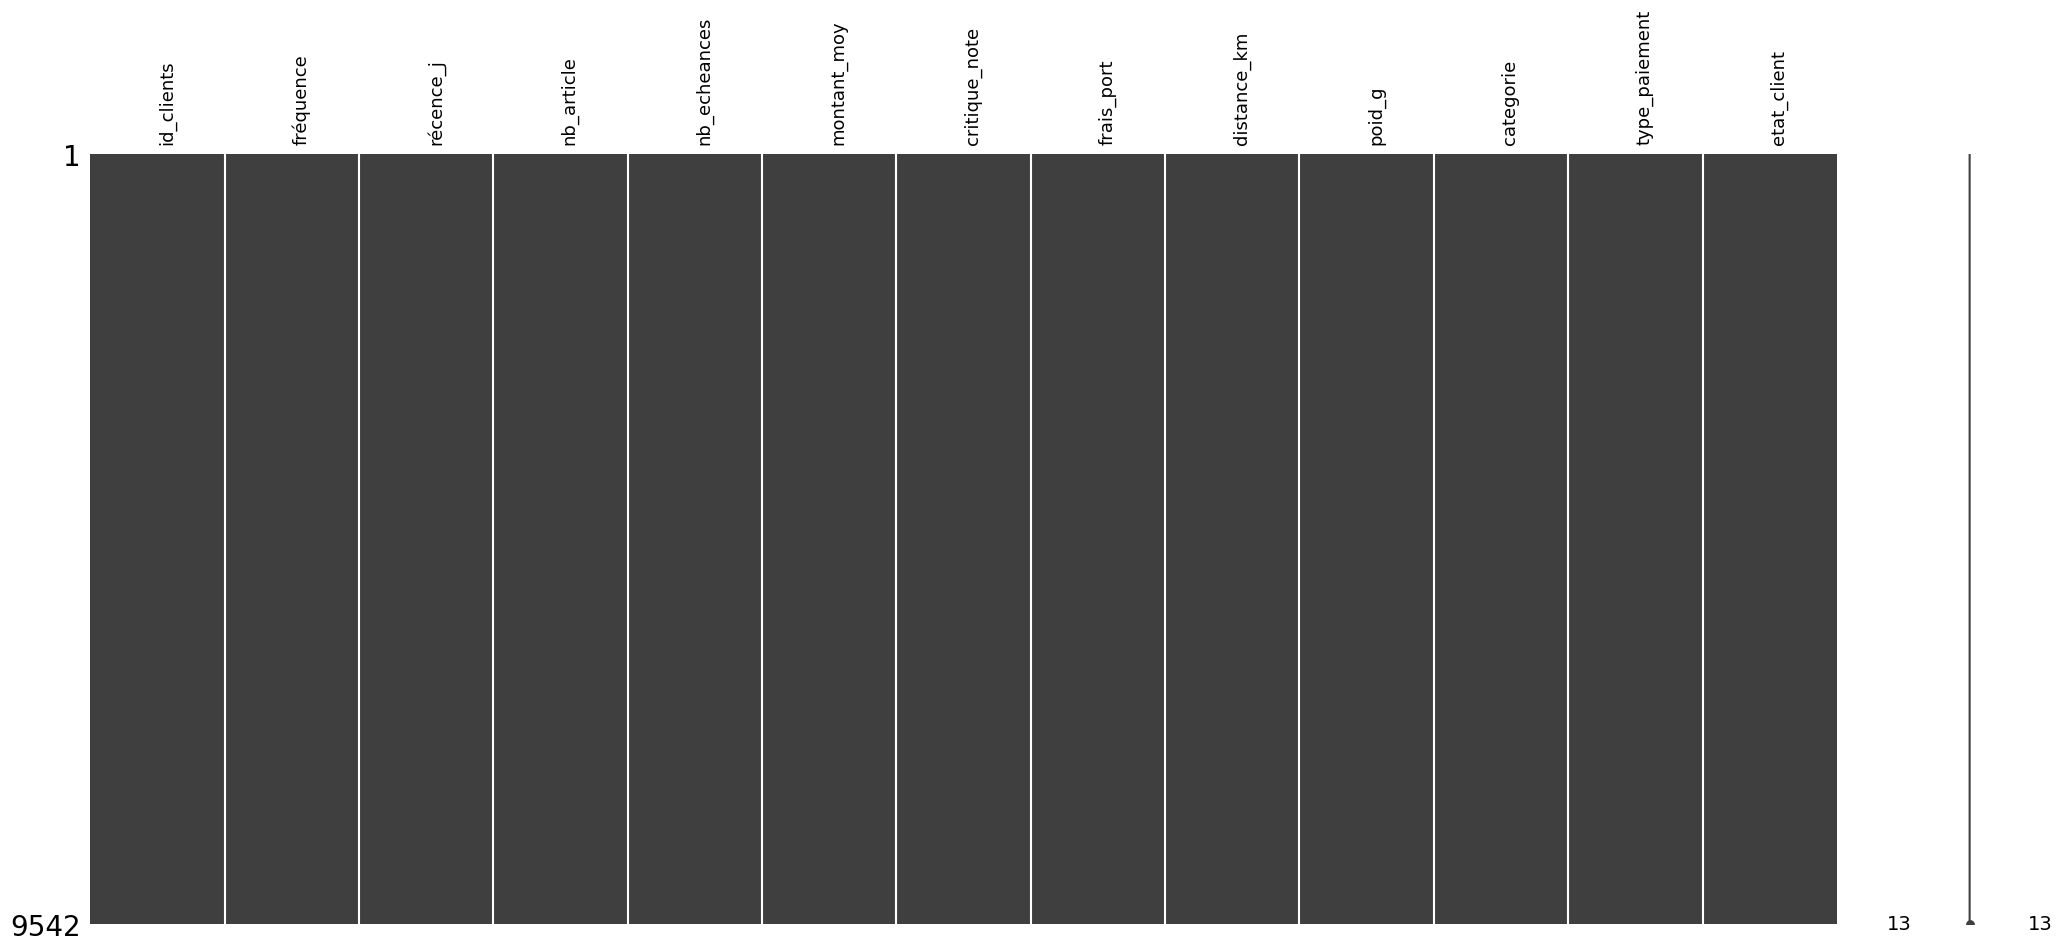

In [207]:
clean.vm(df_agg,0.1,'/content/Fichier_N1/P5_N1_32a.png')

In [208]:
df_agg.isna().sum()

id_clients       0
fréquence        0
récence_j        0
nb_article       0
nb_echeances     0
montant_moy      0
critique_note    0
frais_port       0
distance_km      0
poid_g           0
categorie        0
type_paiement    0
etat_client      0
dtype: int64

In [209]:
df_agg.dtypes

id_clients        object
fréquence          int64
récence_j          int64
nb_article       float64
nb_echeances     float64
montant_moy      float64
critique_note    float64
frais_port       float64
distance_km      float64
poid_g           float64
categorie         object
type_paiement     object
etat_client       object
dtype: object

- ### Exportation df_agg

In [210]:
df_agg.to_csv('/content/Fichier_N1/df_agg.csv') 

# <a name="C4">4. Exploration des données </a>


In [213]:
#Imporation du DataFrame sauvegardé 
df= pd.read_csv('/content/df_agg.csv')
df = df.drop(columns = ['Unnamed: 0'
                      ])

In [214]:
df.head()

,id_clients,fréquence,récence_j,nb_article,nb_echeances,montant_moy,critique_note,frais_port,distance_km,poid_g,categorie,type_paiement,etat_client
0,8d50f5eadf50201ccdcedfb9e2ac8455,16,133,1.000000,1.375000,56.377500,5.000000,10.776250,169.575000,345.187500,SPORTS_LEISURE,credit_card,SP
1,3e43e6105506432c953e165fb2acf44c,9,29,1.555556,7.111111,218.175556,2.777778,19.091111,287.777778,1322.222222,BED_BATH_TABLE,credit_card,SP
2,6469f99c1f9dfae7733b25662e7f1782,7,186,1.285714,2.857143,139.012857,5.000000,13.518571,219.328571,3651.428571,BED_BATH_TABLE,credit_card,SP
3,12f5d6e1cbf93dafd9dcc19095df0b3d,6,609,1.000000,1.000000,18.453333,5.000000,8.720000,12.500000,200.000000,FURNITURE_BEDROOM,boleto,PR
4,dc813062e0fc23409cd255f7f53c7074,6,130,1.833333,10.500000,451.745000,4.500000,57.643333,1886.250000,1852.666667,TOYS,credit_card,PE


Pour la variable de récence en jour. Je fais l'hypothèse qu'au moment de l'étude 

In [215]:
df['récence_j'].min()

23

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95417 entries, 0 to 95416
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_clients     95417 non-null  object 
 1   fréquence      95417 non-null  int64  
 2   récence_j      95417 non-null  int64  
 3   nb_article     95417 non-null  float64
 4   nb_echeances   95417 non-null  float64
 5   montant_moy    95417 non-null  float64
 6   critique_note  95417 non-null  float64
 7   frais_port     95417 non-null  float64
 8   distance_km    95417 non-null  float64
 9   poid_g         95417 non-null  float64
 10  categorie      95417 non-null  object 
 11  type_paiement  95417 non-null  object 
 12  etat_client    95417 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 9.5+ MB


Il y a 95419 clients dans la base de données. Nous aurons donc 95419 clients à classer en différentes catégories. 

## <a name="C41">4.1 Analyses univariées </a>

In [ ]:
df.columns

Index(['id_clients', 'fréquence', 'récence_j', 'nb_article', 'nb_echeances',
       'montant_moy', 'frais_port', 'distance_km', 'poid_g', 'categorie',
       'type_paiement', 'etat_client'],
      dtype='object')

- ## Variables qualitatives

- #### Variable 'etat_client'

In [217]:
df['etat_client'].unique()
#Anomalie !

array(['SP', 'PR', 'PE', 'RJ', 'MA', 'MG', 'RS', 'ES', 'AM', 'BA', 'PB',
       'SC', 'GO', 'PA', 'PI', 'DF', 'CE', 'MS', 'RO', 'MT', 'TO', 'SE',
       'AL', 'RN', 'AC', "['RJ']", "['DF']", 'RR', 'AP', "['CE']",
       "['ES']", "['RN']", "['MG']", "['BA']", "['GO']", "['PR']",
       "['SP']", "['PA']", "['MA']", "['RS']", "['AL']", "['PI']",
       "['PE']", "['PB']", "['RO']", "['MT']", "['TO']", "['SE']"],
      dtype=object)

In [218]:
#Rectification 
for i, it in df['etat_client'].items():
  df.loc[i,'etat_client'] = str(it)
  if len(it) > 2:
    df.loc[i,'etat_client'] = str(it)[2:4]


In [219]:
df['etat_client'].unique()
#Vérification -- OK !

array(['SP', 'PR', 'PE', 'RJ', 'MA', 'MG', 'RS', 'ES', 'AM', 'BA', 'PB',
       'SC', 'GO', 'PA', 'PI', 'DF', 'CE', 'MS', 'RO', 'MT', 'TO', 'SE',
       'AL', 'RN', 'AC', 'RR', 'AP'], dtype=object)

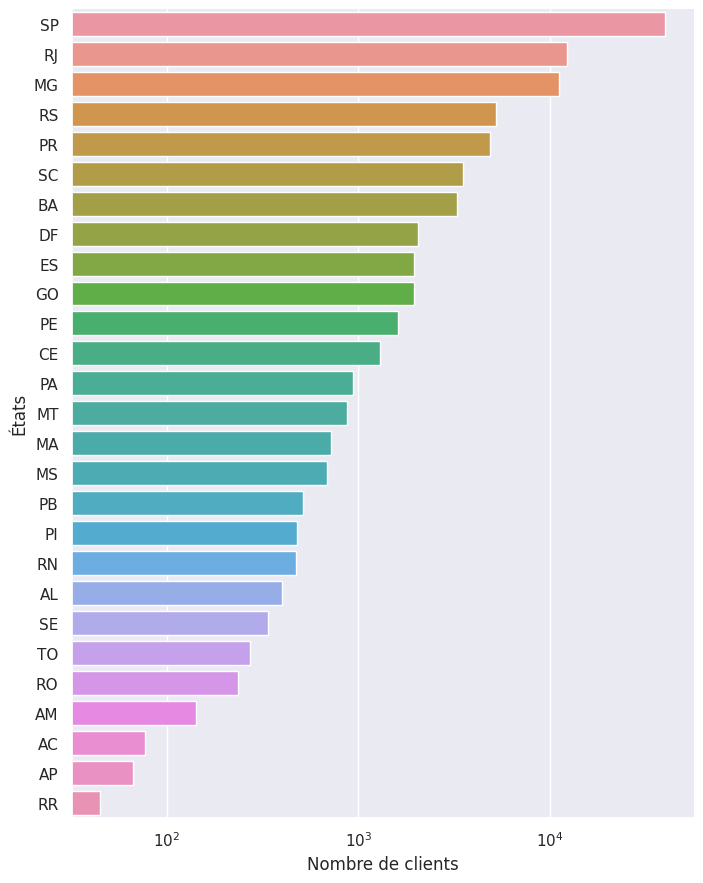

In [220]:
sns.set()
order_= df['etat_client'].value_counts().index
g = sns.catplot(data = df, y = 'etat_client', kind = 'count', orient = 'h', order = order_,
                height = 9., aspect = 0.8, log = True)
g.set_xlabels('Nombre de clients')
g.set_ylabels('États')
plt.savefig('/content/Fichier_N1/P5_N1_41a.png', bbox_inches = 'tight')

- #### Variable 'catégorie'

Je regroupe les catégories pour d'avantage de lisibilité. J'utilise la nomenclature des catégorie AMAZON

In [221]:
Mapping = {'SPORTS_LEISURE': 'SPORTS & LOISIRS',
           'BED_BATH_TABLE':'CUISINE & MAISON',
           'FURNITURE_BEDROOM':'CUISINE & MAISON',
           'FURNITURE_LIVING_ROOM':'CUISINE & MAISON',
           'TOYS': 'JOUETS ENFANTS & BÉBÉS',
           'AUTO' : 'AUTOMOBILE & INDUSTRIE',
           'HOUSEWARES':'CUISINE & MAISON', 'COOL_STUFF': 'DIVERS & MARKET PLACE',
           'HOME_APPLIANCES':'CUISINE & MAISON',
           'WATCHES_GIFTS': 'BIJOUX & ACCESSOIRES',
           'FASHION_BAGS_ACCESSORIES': 'BIJOUX & ACCESSOIRES',
           'HEALTH_BEAUTY' : 'BEAUTÉ & BIEN-ÊTRE',
           'TELEPHONY' : 'HIGH-TECH', 'COMPUTERS_ACCESSORIES':'HIGH-TECH', 
           'STATIONERY':'LIVRES & PAPÉTERIE','FURNITURE_DECOR' : 'CUISINE & MAISON', 
           'FOOD': 'ÉPICERIE', 'HOME_APPLIANCES_2':'CUISINE & MAISON',
           'PET_SHOP': 'BRICOLAGE, JARDIN, ANIMALERIE', 'BABY' : 'JOUETS ENFANTS & BÉBÉS',
           'GARDEN_TOOLS' : 'BRICOLAGE, JARDIN, ANIMALERIE', 'AUDIO':'HIGH-TECH' , 
           'PERFUMERY':'BEAUTÉ & BIEN-ÊTRE', 'ELECTRONICS' : 'HIGH-TECH',
           'LUGGAGE_ACCESSORIES': 'BIJOUX & ACCESSOIRES', 'FASHION_SPORT': 'MODE', 
           'TABLETS_PRINTING_IMAGE':'HIGH-TECH',
           'FOOD_DRINK': 'ÉPICERIE', 'ART' : 'ART & CULTURE', 
           'COSTRUCTION_TOOLS_TOOLS': 'BRICOLAGE, JARDIN, ANIMALERIE', 
           'AIR_CONDITIONING':'BRICOLAGE, JARDIN, ANIMALERIE',
           'HOME_CONFORT': 'CUISINE & MAISON','FASHIO_FEMALE_CLOTHING' : 'MODE', 
           'MUSICAL_INSTRUMENTS': 'ART & CULTURE', 'MARKET_PLACE' : 'DIVERS & MARKET PLACE',
           'CONSOLES_GAMES': 'JEUX VIDÉOS', 'OTHER' : 'DIVERS & MARKET PLACE', 'HOME_CONSTRUCTION' : 'BRICOLAGE, JARDIN, ANIMALERIE',
           'SMALL_APPLIANCES' :'CUISINE & MAISON','FURNITURE_MATTRESS_AND_UPHOLSTERY' : 'CUISINE & MAISON',
           'KITCHEN_DINING_LAUNDRY_GARDEN_FURNITURE': 'CUISINE & MAISON',
           'CONSTRUCTION_TOOLS_CONSTRUCTION': 'CUISINE & MAISON', 'BOOKS_GENERAL_INTEREST': 'LIVRES & PAPÉTERIE',
           'OFFICE_FURNITURE':'BUREAU & SÉCURITÉ', 'SIGNALING_AND_SECURITY': 'BUREAU & SÉCURITÉ', 
           'AGRO_INDUSTRY_AND_COMMERCE': 'AUTOMOBILE & INDUSTRIE','CONSTRUCTION_TOOLS_SAFETY': 'AUTOMOBILE & INDUSTRIE',
           'CINE_PHOTO': 'ART & CULTURE', 'FASHION_SHOES': 'MODE', 'INDUSTRY_COMMERCE_AND_BUSINESS' : 'AUTOMOBILE & INDUSTRIE',
           'COMPUTERS': 'HIGH-TECH', 'MUSIC': 'ART & CULTURE', 'LA_CUISINE':'CUISINE & MAISON', 'CHRISTMAS_SUPPLIES': 'CUISINE & MAISON',
           'CONSTRUCTION_TOOLS_LIGHTS': 'BRICOLAGE, JARDIN, ANIMALERIE' , 'FASHION_UNDERWEAR_BEACH' : 'MODE',
           'COSTRUCTION_TOOLS_GARDEN': 'BRICOLAGE, JARDIN, ANIMALERIE' , 'FASHION_MALE_CLOTHING':'MODE',
           'FIXED_TELEPHONY': 'HIGH-TECH', 'DRINKS':'ÉPICERIE', 'HOME_COMFORT_2':'CUISINE & MAISON',
           'ARTS_AND_CRAFTMANSHIP': 'ART & CULTURE', 'DIAPERS_AND_HYGIENE': 'JOUETS ENFANTS & BÉBÉS', 'BOOKS_IMPORTED':'LIVRES & PAPÉTERIE',
           'DVDS_BLU_RAY':'ART & CULTURE', 'BOOKS_TECHNICAL':'LIVRES & PAPÉTERIE', 'FLOWERS':'BRICOLAGE, JARDIN, ANIMALERIE' ,
           'CDS_DVDS_MUSICALS':'ART & CULTURE','PARTY_SUPPLIES': 'CUISINE & MAISON', 'SMALL_APPLIANCES_HOME_OVEN_AND_COFFEE': 'CUISINE & MAISON',
           'SECURITY_AND_SERVICES':'BUREAU & SÉCURITÉ', 'FASHION_CHILDRENS_CLOTHES':'MODE'
           }

df['categorie'] = df['categorie'].replace(Mapping)

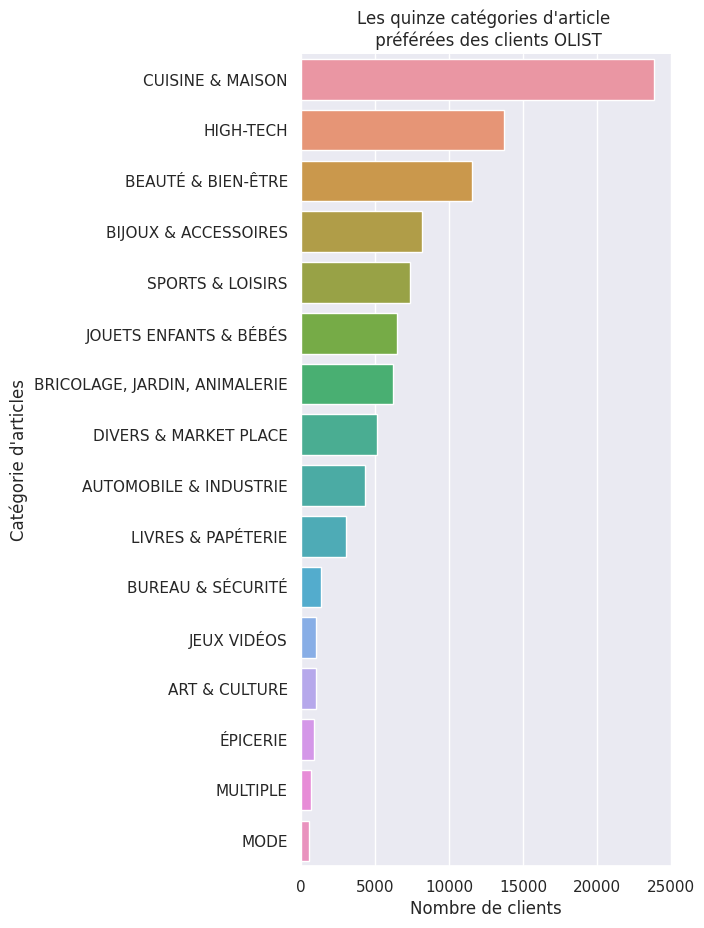

In [222]:
sns.set()
order_= df['categorie'].value_counts().index
g = sns.catplot(data = df, y = 'categorie', kind = 'count', orient = 'h', order = order_,
                height = 9., aspect = 0.8)#, log = True)
g.set_xlabels('Nombre de clients')
g.set_ylabels('Catégorie d\'articles')
plt.title('Les quinze catégories d\'article \n préférées des clients OLIST')
plt.savefig('/content/Fichier_N1/P5_N1_41b.png', bbox_inches = 'tight')

- #### variable  'type de paiement' 

In [223]:
df['type_paiement'].unique()

array(['credit_card', 'boleto', 'voucher', 'multiple', 'debit_card'],
      dtype=object)

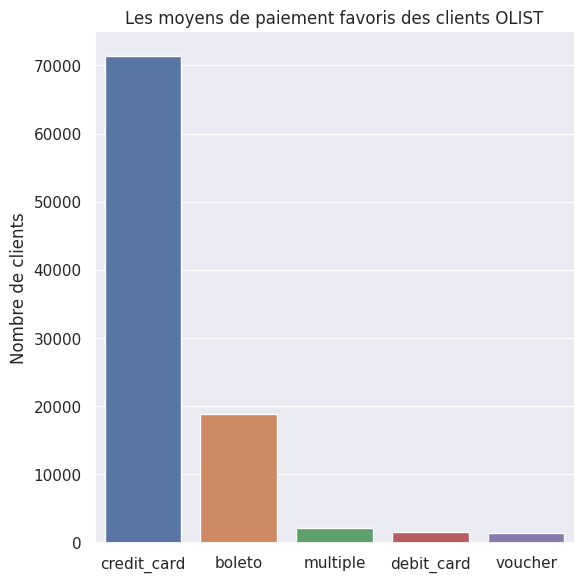

In [224]:
sns.set()
order_= df['type_paiement'].value_counts().index
g = sns.catplot(data = df, x = 'type_paiement', kind = 'count', order = order_,
                height = 6., aspect = 1.)#, log = True)
g.set_ylabels('Nombre de clients')
g.set_xlabels('')
plt.title('Les moyens de paiement favoris des clients OLIST')
plt.savefig('/content/Fichier_N1/P5_N1_41c.png', bbox_inches = 'tight')

- ## Variables quantitatives

In [225]:
df.describe()

,fréquence,récence_j,nb_article,nb_echeances,montant_moy,critique_note,frais_port,distance_km,poid_g
count,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000
mean,1.034019,356.794680,1.139042,2.918717,206.064813,4.072580,22.818222,603.318732,2392.473555
std,0.211237,177.120359,0.526705,2.692740,620.616511,1.367151,21.558846,593.587582,4755.511863
min,1.000000,23.000000,1.000000,1.000000,9.590000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,216.000000,1.000000,1.000000,63.270000,4.000000,13.890000,191.300000,300.000000
50%,1.000000,339.000000,1.000000,2.000000,111.030000,5.000000,17.240000,435.900000,750.000000
75%,1.000000,488.000000,1.000000,4.000000,196.370000,5.000000,24.130000,801.700000,2100.000000
max,16.000000,1055.000000,21.000000,24.000000,109312.640000,5.000000,1794.960000,3579.900000,184400.000000


- ### Variable 'fréquence'

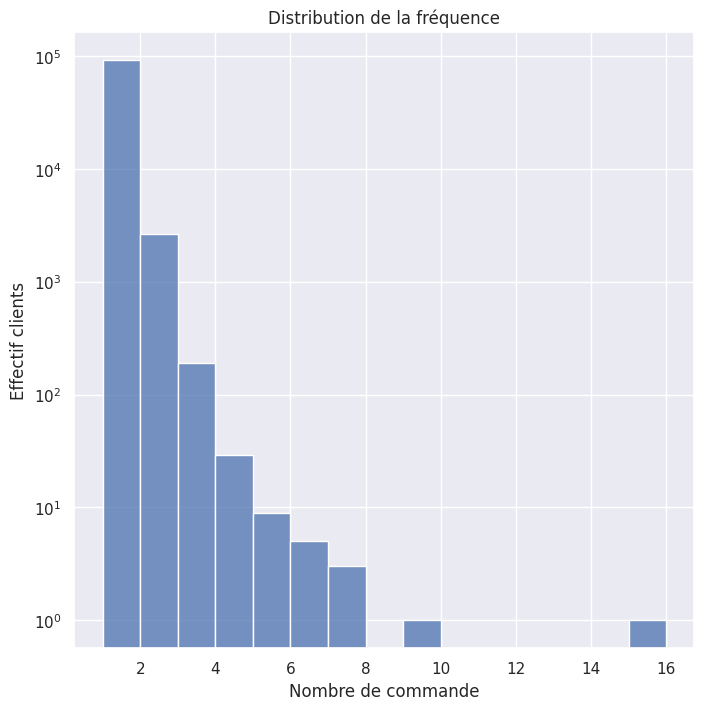

In [226]:
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df, x ='fréquence', log_scale = (False, True), binwidth = 1)
ax.set_xlabel('Nombre de commande')
ax.set_ylabel('Effectif clients')
plt.title('Distribution de la fréquence')
plt.savefig('/content/Fichier_N1/P5_N1_41d.png', bbox_inches = 'tight')

In [227]:
len(df[df['fréquence']>1])/len(df)

0.030529150989865538

Comme stipulé dans l'énoncé, seul 3% des clients ont effectué plusieurs commandes. Question possible : 'Pourquoi ne reviennent-ils pas ?'

- ### Variable 'récence_j'

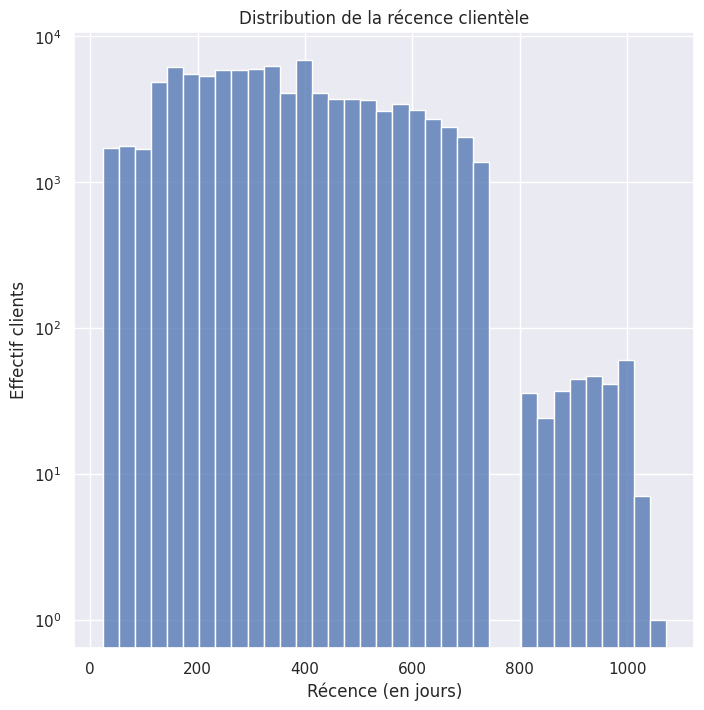

In [228]:
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df, x ='récence_j', log_scale = (False, True), binwidth = 30)
ax.set_xlabel('Récence (en jours)')
ax.set_ylabel('Effectif clients')
plt.title('Distribution de la récence clientèle')
plt.savefig('/content/Fichier_N1/P5_N1_41e.png', bbox_inches = 'tight')

Deux groupes de clients se distinguent, ceux qui ont acheté durant les 24 derniers mois au moment où les données ont été recueillis et ceux qui ont effectué des achat il y a plus de 24 mois. 

- ### Variable 'nb_article'

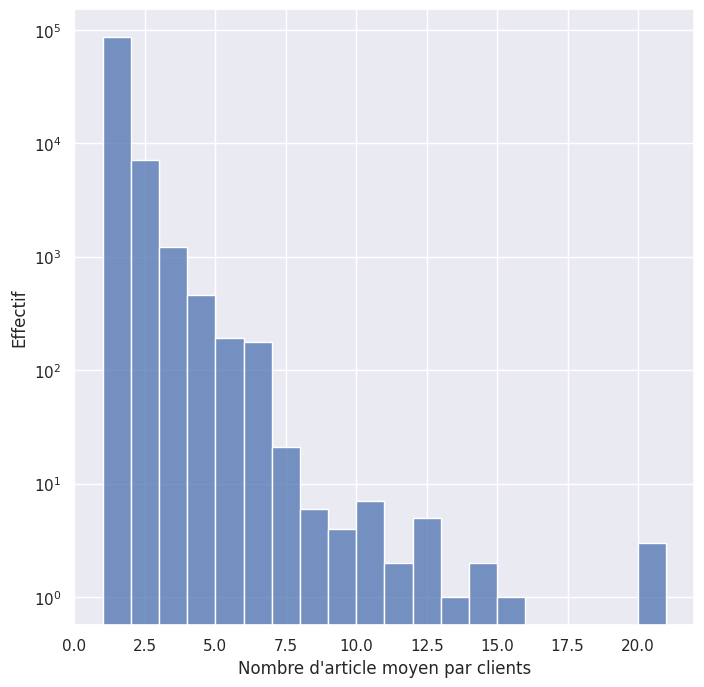

In [229]:
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
g = sns.histplot(data = df, x ='nb_article', log_scale = (False, True), binwidth = 1)
ax.set_xlabel('Nombre d\'article moyen par clients')
ax.set_ylabel('Effectif')
#tick = np.arange(0,21,5)
#g.set_xticklabels(tick)
plt.savefig('/content/Fichier_N1/P5_N1_41f.png', bbox_inches = 'tight')

Plusieurs groupent se distinguent: 


1.   Le groupe majoritaire qui achète uniquement un article par commande
2.   Le groupe qui achète entre 2 et 6 articles en moyenne à chaque commande
3.   Le groupe minoritaire qui achète plus de 6 articles. 



- ### Variable 'nb_echeances'

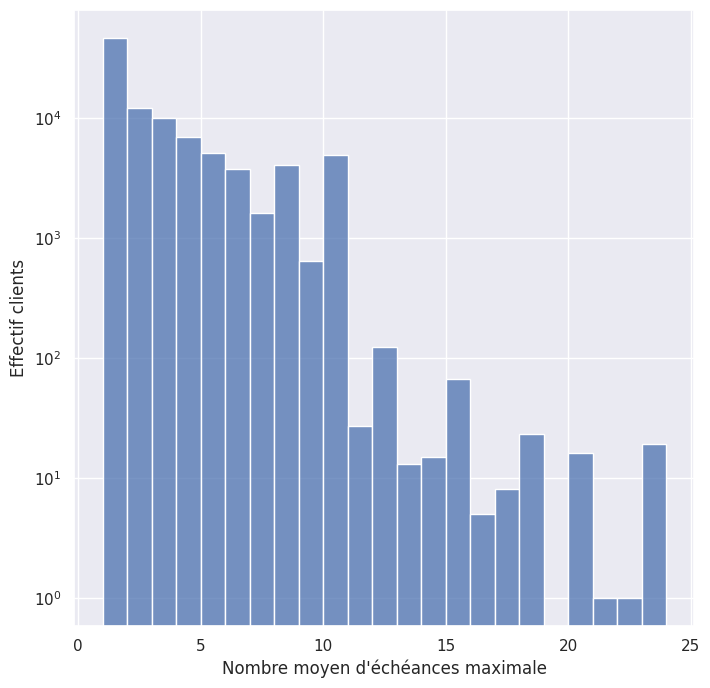

In [230]:
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df, x ='nb_echeances', log_scale = (False, True), binwidth = 1)
ax.set_xlabel('Nombre moyen d\'échéances maximale')
ax.set_ylabel('Effectif clients')
plt.savefig('/content/Fichier_N1/P5_N1_41g.png', bbox_inches = 'tight')

On distingue plusieurs groupes : 


1.   Environ 46k clients, 48% des clients payent une commande en une fois.
2.   L'autre moitié, environ 46% des clients payent leur commande en 2 à 10 échéances. 
3.  Seuls, 0.3% des clients payent en plus de 10 fois. 

In [231]:
#len(df[df['nb_echeances'] == 1])/ len(df)
#len(df[(df['nb_echeances'] > 1) & (df['nb_echeances'] < 10)])/ len(df)
len(df[df['nb_echeances'] > 10])/ len(df)

0.0033537000744102204

- ### Variable 'montant_moyen'

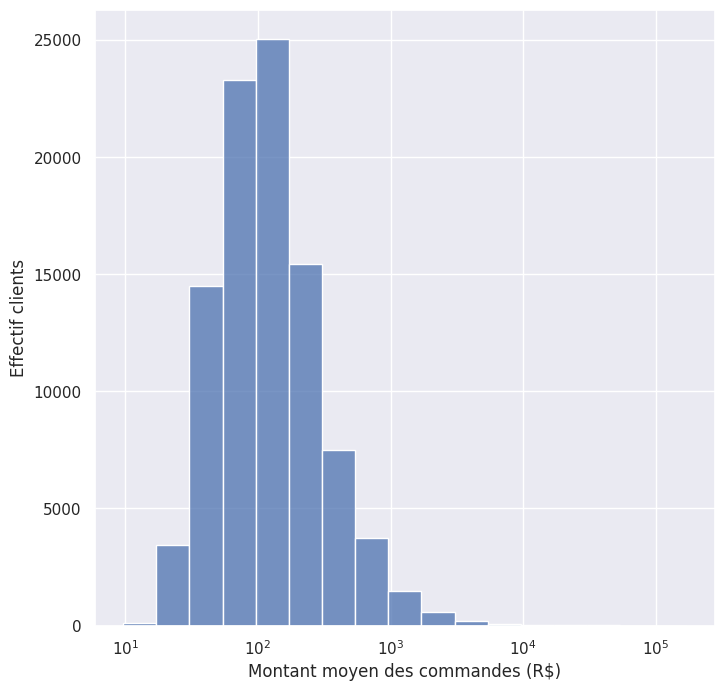

In [232]:
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df, x ='montant_moy', log_scale = (True, False), binwidth = 0.25)
ax.set_xlabel('Montant moyen des commandes (R$)')
ax.set_ylabel('Effectif clients')
plt.savefig('/content/Fichier_N1/P5_N1_41h.png', bbox_inches = 'tight')



*   La moitié des clients dépensent en moyenne entre 75 et 125 réals. 






- ### Variable 'frais_port'

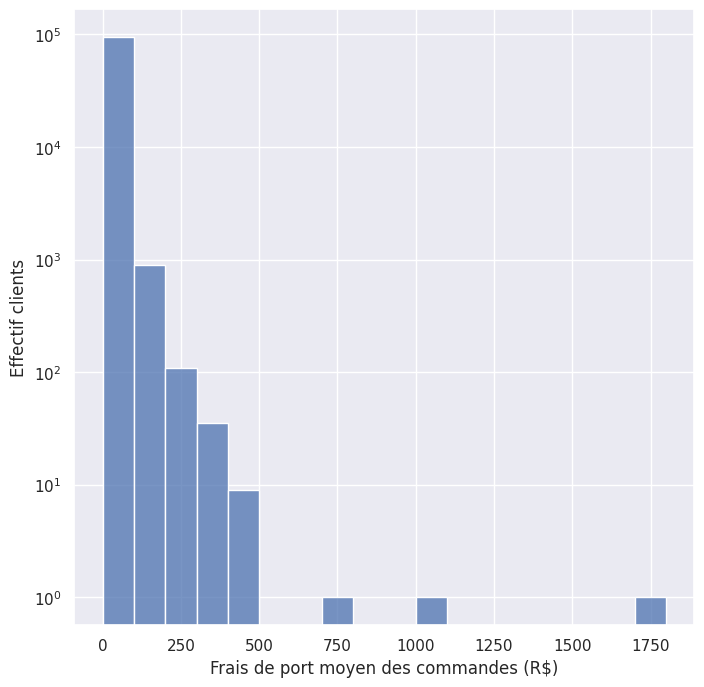

In [233]:
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df, x ='frais_port',  log_scale = [False, True], binwidth = 100,)
ax.set_xlabel('Frais de port moyen des commandes (R$)')
ax.set_ylabel('Effectif clients')
plt.savefig('/content/Fichier_N1/P5_N1_41i.png', bbox_inches = 'tight')

La majorité des clients, environ 93k/95k, paye des frais de port compris entre 0 et 100 R$, les reste paye des frais plus élevé. 

Idée de feature enginnnering : transformer la variable frais de port moyen en pourcentage du paiement total moyen. 

- ### Variable 'distance_km'

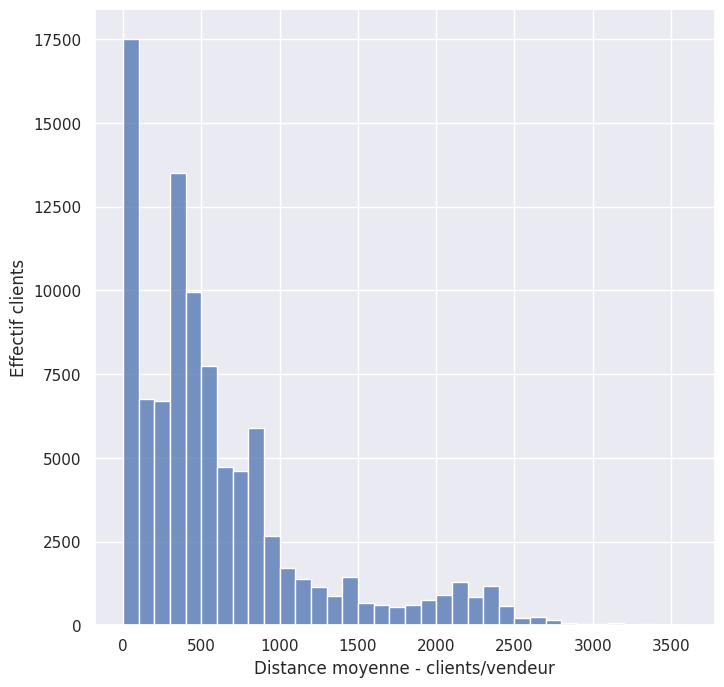

In [234]:
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df, x ='distance_km',  binwidth = 100) #  log_scale = [False, True], binwidth = 100,)
ax.set_xlabel('Distance moyenne - clients/vendeur')
ax.set_ylabel('Effectif clients')
plt.savefig('/content/Fichier_N1/P5_N1_41j.png', bbox_inches = 'tight')

- ### Variable 'poid_g'

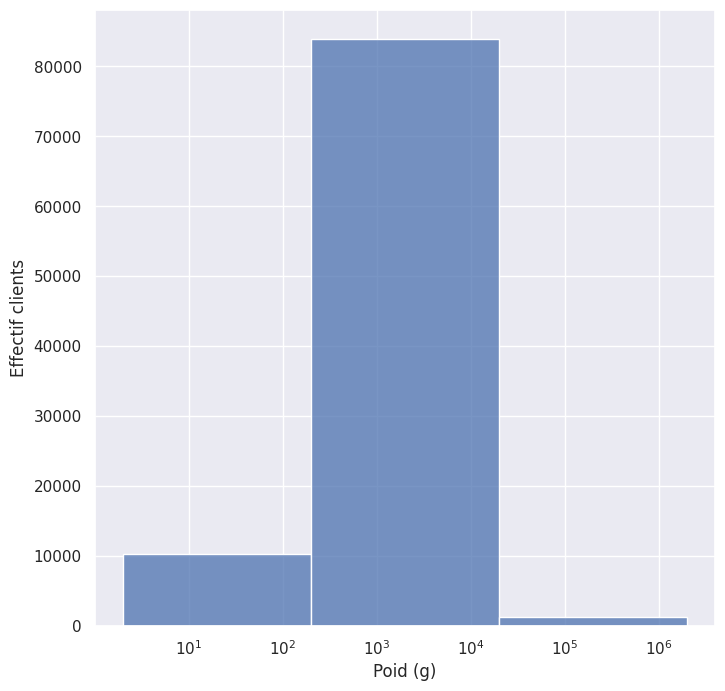

In [235]:
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df, x ='poid_g',log_scale = [True, False], binwidth = 2)
ax.set_xlabel('Poid (g)')
ax.set_ylabel('Effectif clients')
plt.savefig('/content/Fichier_N1/P5_N1_41k.png', bbox_inches = 'tight')

- ### Variable 'critique_note'

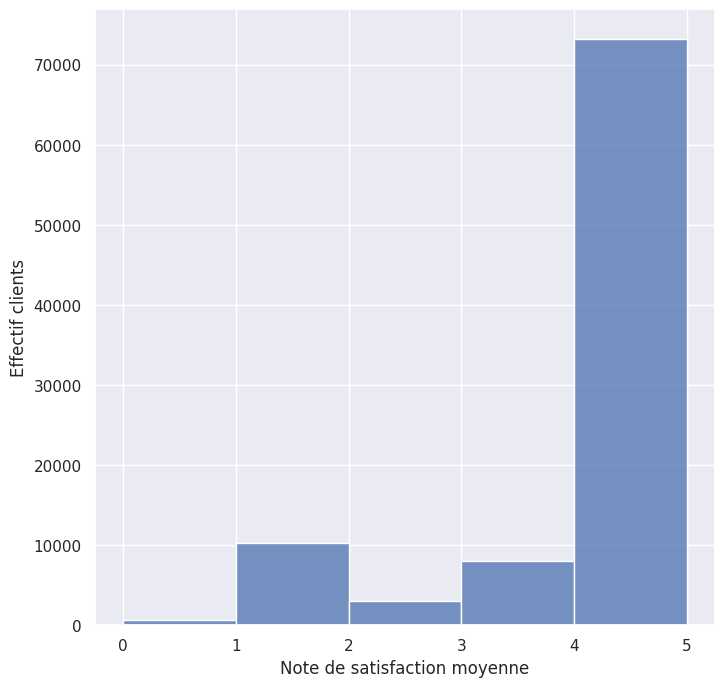

In [240]:
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df, x ='critique_note', binwidth = 1) #log_scale = (True, False), binwidth = 0.25)
ax.set_xlabel('Note de satisfaction moyenne')
ax.set_ylabel('Effectif clients')
plt.savefig('/content/Fichier_N1/P5_N1_41l.png', bbox_inches = 'tight')

## <a name="C42">4.2 Analyses bivariées </a>

- ## Variables quantitatives vs variables quantitatives

<Axes: xlabel='fréquence', ylabel='récence_j'>

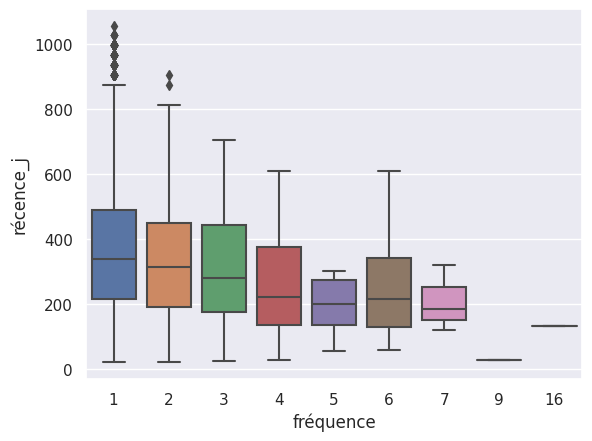

In [241]:
sns.set()
sns.boxplot(data = df, x = 'fréquence', y = 'récence_j')

Il y a une corrélation entre la fréquence et la récence. Ce qui est logique, les clients qui achètent le plus souvent sont suceptibles d'avoir acheté plus récemment. 

<Axes: xlabel='fréquence', ylabel='montant_moy'>

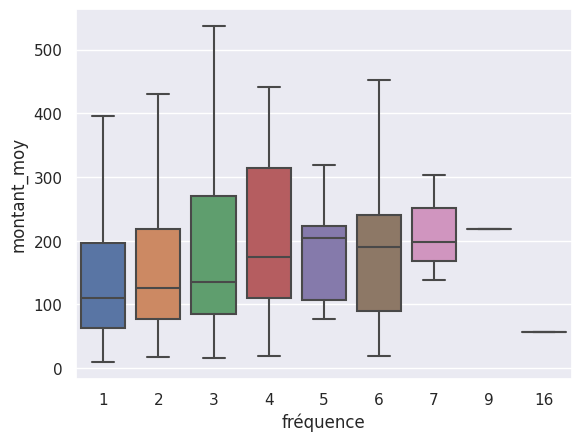

In [242]:
sns.set()
sns.boxplot(data = df, x = 'fréquence', y = 'montant_moy',showfliers = False)

Corrélation notable entre la fréquence et le montant moyen des commandes. Le client qui effectue un nombre de commande élevé est plus suceptibles d'acheter avec des montants élévés. Une exception, un individu qui a effectué 16 commandes au total de petit montant. 

<Axes: xlabel='fréquence', ylabel='distance_km'>

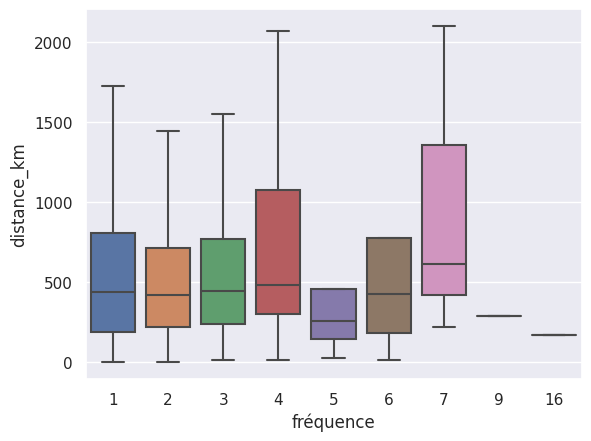

In [243]:
sns.set()
sns.boxplot(data = df, x = 'fréquence', y = 'distance_km', showfliers = False)

<Axes: xlabel='fréquence', ylabel='nb_article'>

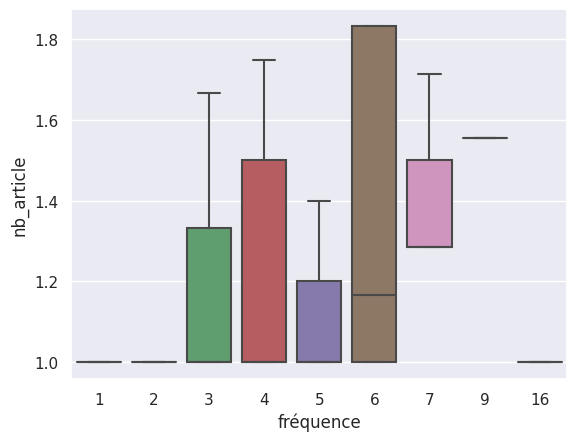

In [244]:
sns.set()
sns.boxplot(data = df, x = 'fréquence', y = 'nb_article', showfliers = False)

<Axes: xlabel='fréquence', ylabel='critique_note'>

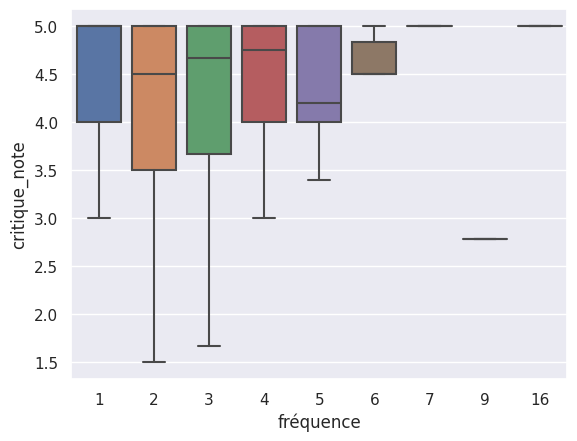

In [245]:
sns.set()
sns.boxplot(data = df, x = 'fréquence', y = 'critique_note', showfliers = False)

In [ ]:
df.describe()

,fréquence,récence_j,nb_article,nb_echeances,montant_moy,frais_port,distance_km,poid_g
count,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000
mean,1.034019,1919.794680,1.139042,2.918717,206.064813,22.818222,603.318732,2392.473555
std,0.211237,177.120359,0.526705,2.692740,620.616511,21.558846,593.587582,4755.511863
min,1.000000,1586.000000,1.000000,1.000000,9.590000,0.000000,0.000000,2.000000
25%,1.000000,1779.000000,1.000000,1.000000,63.270000,13.890000,191.300000,300.000000
50%,1.000000,1902.000000,1.000000,2.000000,111.030000,17.240000,435.900000,750.000000
75%,1.000000,2051.000000,1.000000,4.000000,196.370000,24.130000,801.700000,2100.000000
max,16.000000,2618.000000,21.000000,24.000000,109312.640000,1794.960000,3579.900000,184400.000000


<Axes: xlabel='poid_g', ylabel='frais_port'>

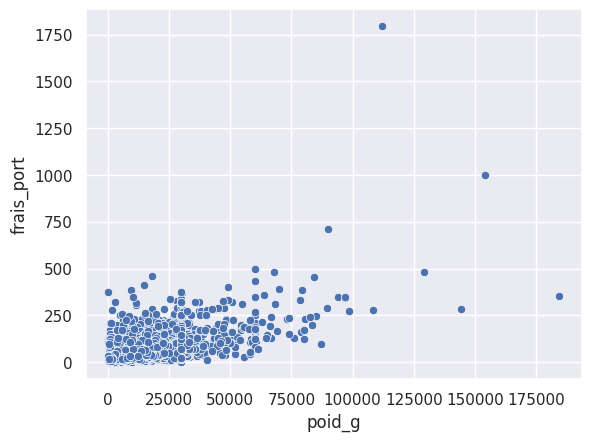

In [ ]:
sns.set()
sns.scatterplot(data = df, y = 'frais_port', x = 'poid_g')

<Axes: xlabel='montant_moy', ylabel='frais_port'>

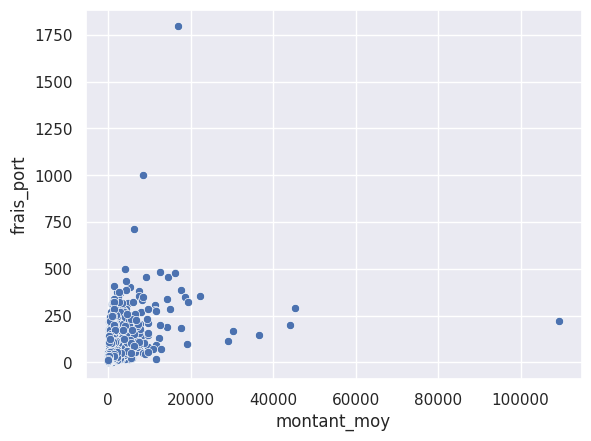

In [ ]:
sns.set()
sns.scatterplot(data = df, y = 'frais_port', x = 'montant_moy')

<Axes: >

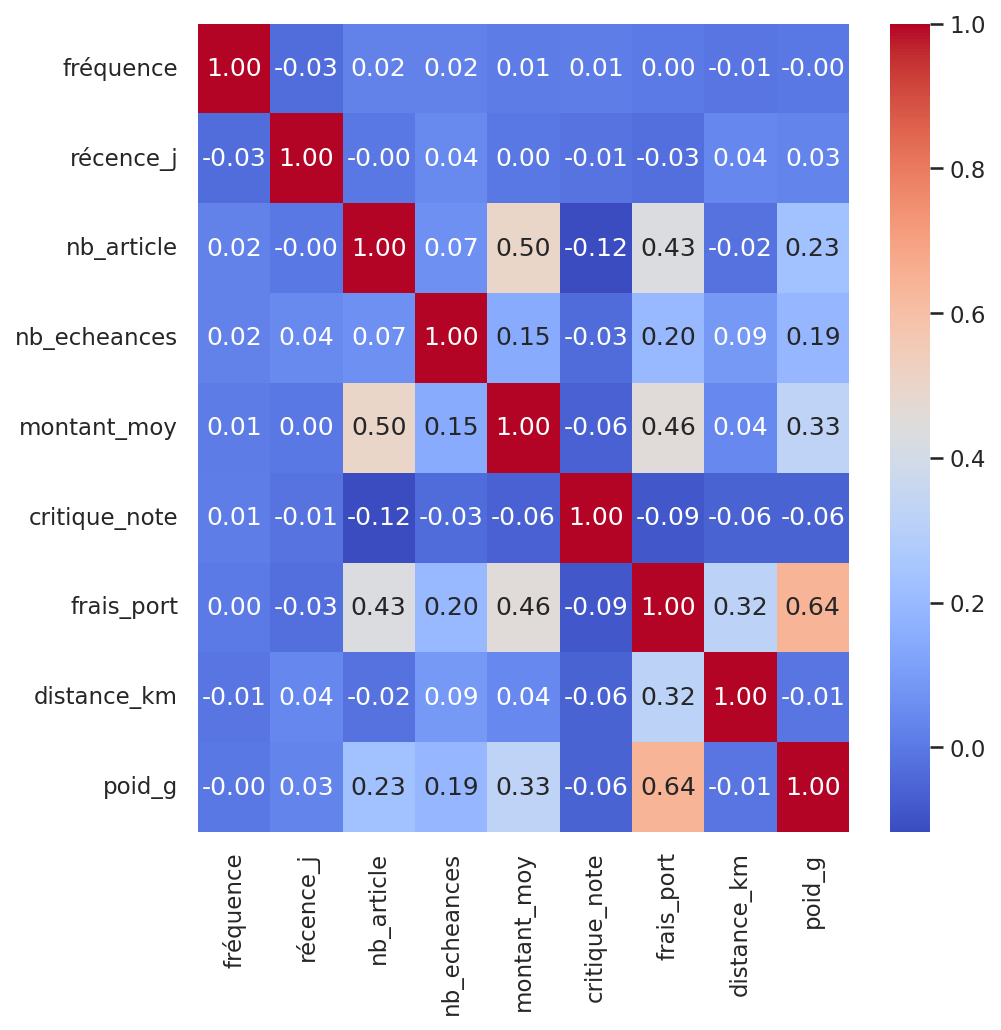

In [246]:
var_quant = df.dtypes[df.dtypes != 'object'].index
sns.set()
fig, ax = plt.subplots(figsize=(7,7), dpi = 150)
sns.heatmap(df[var_quant].corr(),annot=True, cmap="coolwarm", fmt="0.2f")
#plt.savefig('P4_N1_42a.png',bbox_inches = 'tight')

La seule corrélation linéaire : les frais de port sont linéairement corrélés au poid. 

- ## Variables qualitatives vs variables qualitatives

In [247]:
var_qual = df.dtypes[df.dtypes == 'object'].index
var_qual 

Index(['id_clients', 'categorie', 'type_paiement', 'etat_client'], dtype='object')

In [248]:
df['categorie'].unique()

array(['SPORTS & LOISIRS', 'CUISINE & MAISON', 'JOUETS ENFANTS & BÉBÉS',
       'AUTOMOBILE & INDUSTRIE', 'BIJOUX & ACCESSOIRES',
       'BEAUTÉ & BIEN-ÊTRE', 'HIGH-TECH', 'LIVRES & PAPÉTERIE',
       'MULTIPLE', 'ÉPICERIE', 'BRICOLAGE, JARDIN, ANIMALERIE',
       'DIVERS & MARKET PLACE', 'MODE', 'ART & CULTURE', 'JEUX VIDÉOS',
       'BUREAU & SÉCURITÉ'], dtype=object)

In [249]:
df['categorie'].value_counts()

CUISINE & MAISON                 23848
HIGH-TECH                        13754
BEAUTÉ & BIEN-ÊTRE               11559
BIJOUX & ACCESSOIRES              8192
SPORTS & LOISIRS                  7378
JOUETS ENFANTS & BÉBÉS            6494
BRICOLAGE, JARDIN, ANIMALERIE     6224
DIVERS & MARKET PLACE             5134
AUTOMOBILE & INDUSTRIE            4310
LIVRES & PAPÉTERIE                3036
BUREAU & SÉCURITÉ                 1376
JEUX VIDÉOS                       1031
ART & CULTURE                      981
ÉPICERIE                           906
MULTIPLE                           683
MODE                               511
Name: categorie, dtype: int64

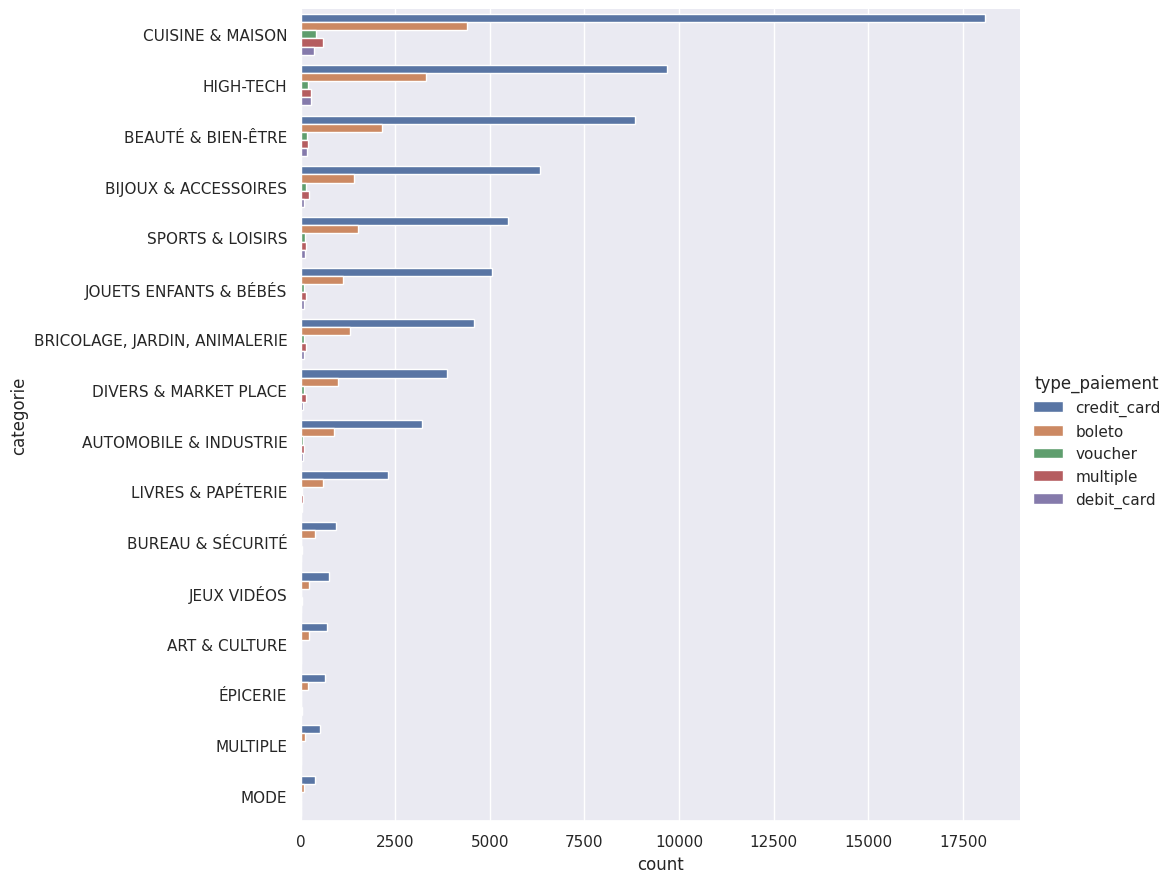

In [250]:
sns.set()
order_ = df['categorie'].value_counts().index
g = sns.catplot(data = df, y  = 'categorie', hue = 'type_paiement', orient = 'h',
                kind = 'count',height=9, aspect = 1.2, order = order_)

- ## Variable quantitatives vs qualitatives

In [ ]:
df.columns

Index(['id_clients', 'fréquence', 'récence_j', 'nb_article', 'nb_echeances',
       'montant_moy', 'frais_port', 'distance_km', 'poid_g', 'categorie',
       'type_paiement', 'etat_client'],
      dtype='object')

In [ ]:
#Folium map 
from folium import plugins
m = folium.Map(  
           width="%100",
           height="%100",
           zoom_start=10.5)
#location=df[['LATITUDE','LONGITUDE']]
state_brazil = '/content/brazil_geo.json' #Délimitation des quartier extrait de opendata seattle
folium.GeoJson(state_brazil, name="geo_brazil").add_to(m)
m
#plugins.MarkerCluster(location).add_to(m)

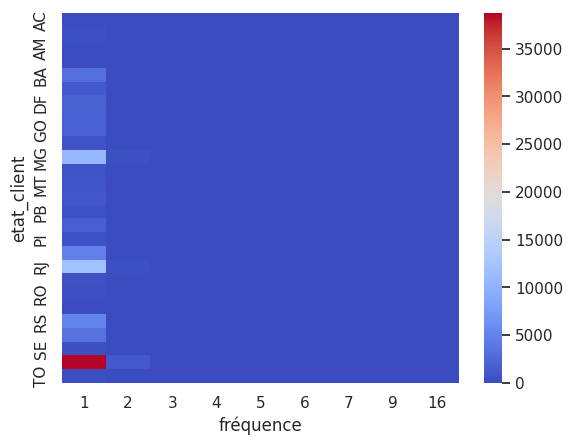

In [ ]:
sns.set()
order_ = df['etat_client'].value_counts().index
g = sns.heatmap(pd.crosstab(df['etat_client'], df['fréquence']),cmap="coolwarm")#,annot=True, , fmt="0f")

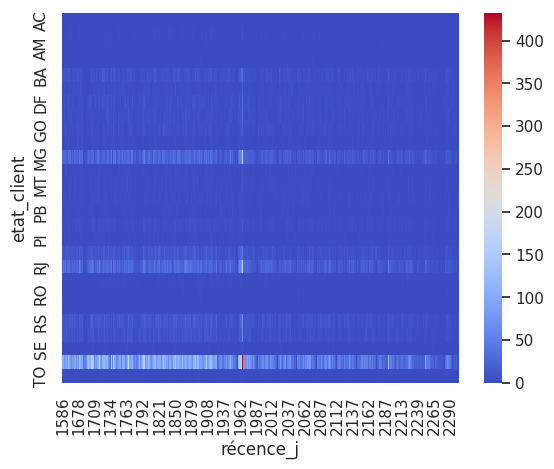

In [ ]:
sns.set()
order_ = df['etat_client'].value_counts().index
g = sns.heatmap(pd.crosstab(df['etat_client'], df['récence_j']),cmap="coolwarm")#,annot=True, , fmt="0f")

In [ ]:
pd.crosstab(df['etat_client'], df['récence_j'])

In [ ]:
#FOLIUM !!

In [ ]:
df.groupby('categorie')['nb_echeances'].median().sort_values().index

categorie
ART & CULTURE                    1.0
AUTOMOBILE & INDUSTRIE           1.0
HIGH-TECH                        1.0
JEUX VIDÉOS                      1.0
LIVRES & PAPÉTERIE               1.0
SPORTS & LOISIRS                 1.0
ÉPICERIE                         1.0
BRICOLAGE, JARDIN, ANIMALERIE    1.5
BEAUTÉ & BIEN-ÊTRE               2.0
BUREAU & SÉCURITÉ                2.0
CUISINE & MAISON                 2.0
DIVERS & MARKET PLACE            2.0
JOUETS ENFANTS & BÉBÉS           2.0
MODE                             2.0
BIJOUX & ACCESSOIRES             2.5
MULTIPLE                         3.0
Name: nb_echeances, dtype: float64

<Axes: xlabel='nb_echeances', ylabel='categorie'>

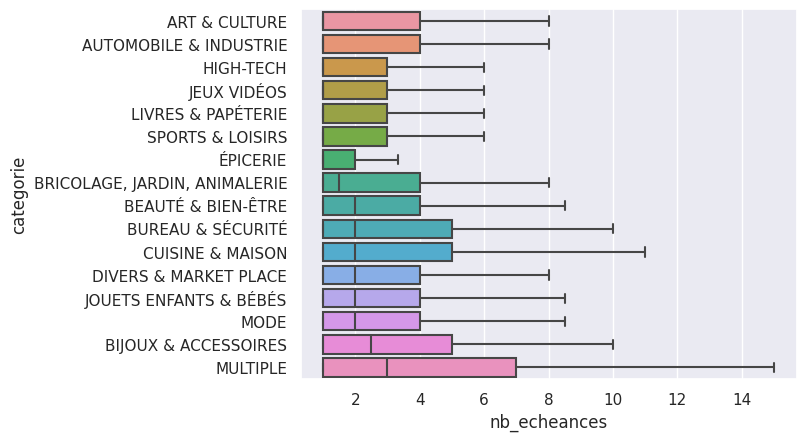

In [ ]:
sns.set()
order_ = df.groupby('categorie')['nb_echeances'].median().sort_values().index
sns.boxplot(data = df, y = 'categorie', x = 'nb_echeances', orient = 'h',
            showfliers = False, order = order_)

Le nombre d'échéances de paiement dépend légèrement de la catégorie d'article acheté. 

<Axes: xlabel='critique_note', ylabel='categorie'>

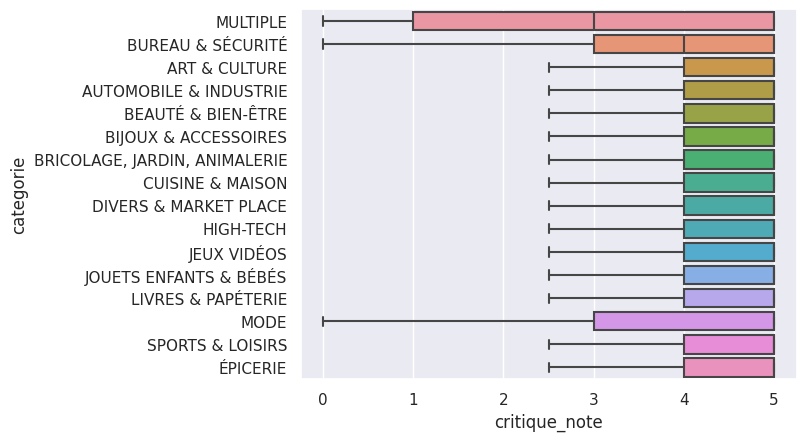

In [251]:
sns.set()
order_ = df.groupby('categorie')['critique_note'].median().sort_values().index
sns.boxplot(data = df, y = 'categorie', x = 'critique_note', orient = 'h',
            showfliers = False, order = order_)

In [252]:
df.groupby('type_paiement')['nb_echeances'].median().reset_index()

,type_paiement,nb_echeances
0,boleto,1.0
1,credit_card,3.0
2,debit_card,1.0
3,multiple,1.0
4,voucher,1.0


<Axes: xlabel='type_paiement', ylabel='nb_echeances'>

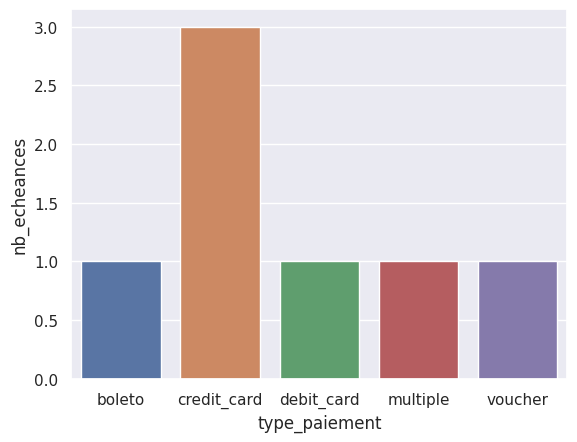

In [253]:
sns.set()
sns.barplot(data = df.groupby('type_paiement')['nb_echeances'].median().reset_index(), x = 'type_paiement', y = 'nb_echeances')

La plupart des paiements effectués en plusieurs fois sont fait par le biais d'une carte de crédit. Logique.

# Téléchargement du dossier Fichier_N1

In [255]:
from google.colab import files
!zip -r Fichier_N1.zip Fichier_N1
files.download('Fichier_N1.zip')

updating: Fichier_N1/ (stored 0%)
updating: Fichier_N1/commandes.csv (deflated 54%)
updating: Fichier_N1/P5_N1_20.png (deflated 34%)
updating: Fichier_N1/zipcode.csv (deflated 61%)
updating: Fichier_N1/P5_N1_3.png (deflated 30%)
updating: Fichier_N1/P5_N1_32a.png (deflated 38%)
updating: Fichier_N1/df_agg.csv (deflated 62%)
updating: Fichier_N1/df_agg.cv (deflated 62%)
updating: Fichier_N1/P5_N1_41j.png (deflated 23%)
updating: Fichier_N1/P5_N1_41i.png (deflated 25%)
updating: Fichier_N1/P5_N1_41l.png (deflated 26%)
updating: Fichier_N1/P5_N1_41h.png (deflated 24%)
updating: Fichier_N1/P5_N1_41f.png (deflated 25%)
updating: Fichier_N1/P5_N1_41d.png (deflated 24%)
updating: Fichier_N1/P5_N1_41b.png (deflated 17%)
updating: Fichier_N1/P5_N1_41e.png (deflated 22%)
updating: Fichier_N1/P5_N1_41c.png (deflated 20%)
updating: Fichier_N1/P5_N1_41k.png (deflated 27%)
updating: Fichier_N1/P5_N1_41g.png (deflated 23%)
updating: Fichier_N1/P5_N1_41a.png (deflated 20%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>